In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

from src.datasets import load_run_over_dataset
from src.model_selection import _internal_grid_search
from src.shadow_learn import ShadowedSetEstimator

In [2]:
X, y, data_labels, target, _ = load_run_over_dataset(target=0, template='macro-districts', without=['DATA'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X.shape

(130, 25)

In [3]:
latent_dim = 15

class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
          layers.Flatten(),
          layers.Dense(250, activation='relu'),
          layers.BatchNormalization(),
          layers.Dropout(0.2),
          layers.Dense(150, activation='relu'),
          layers.Dropout(0.1),
          layers.Dense(75, activation='relu'),
          layers.Dense(latent_dim)
        ])
        self.decoder = tf.keras.Sequential([
          layers.Dense(250, activation='relu'),
          layers.Dropout(0.2),
          layers.Dense(150, activation='relu'),
          layers.Dropout(0.1),
          layers.Dense(75, activation='relu'),
          layers.Dense(25)
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(latent_dim)

In [4]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4), loss=losses.MeanSquaredError())

In [5]:
autoencoder.fit(X_train, X_train,
                epochs=15000,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/15000
4/4 [==============================] - 0s 29ms/step - loss: 424.0223 - val_loss: 472.3577
Epoch 2/15000
4/4 [==============================] - 0s 5ms/step - loss: 423.1095 - val_loss: 470.1642
Epoch 3/15000
4/4 [==============================] - 0s 5ms/step - loss: 422.4597 - val_loss: 468.1801
Epoch 4/15000
4/4 [==============================] - 0s 5ms/step - loss: 421.6455 - val_loss: 466.2636
Epoch 5/15000
4/4 [==============================] - 0s 5ms/step - loss: 421.1552 - val_loss: 464.0156
Epoch 6/15000
4/4 [==============================] - 0s 5ms/step - loss: 420.4684 - val_loss: 461.3847
Epoch 7/15000
4/4 [==============================] - 0s 5ms/step - loss: 419.2132 - val_loss: 458.3837
Epoch 8/15000
4/4 [==============================] - 0s 5ms/step - loss: 418.3934 - val_loss: 455.0405
Epoch 9/15000
4/4 [==============================] - 0s 5ms/step - loss: 416.6678 - val_loss: 451.2260
Epoch 10/15000
4/4 [==============================] - 0s 5ms/step - loss

4/4 [==============================] - 0s 5ms/step - loss: 24.1700 - val_loss: 11.4953
Epoch 81/15000
4/4 [==============================] - 0s 5ms/step - loss: 20.9901 - val_loss: 11.0339
Epoch 82/15000
4/4 [==============================] - 0s 4ms/step - loss: 22.6662 - val_loss: 10.5426
Epoch 83/15000
4/4 [==============================] - 0s 4ms/step - loss: 20.2837 - val_loss: 10.0159
Epoch 84/15000
4/4 [==============================] - 0s 5ms/step - loss: 22.3133 - val_loss: 9.6029
Epoch 85/15000
4/4 [==============================] - 0s 5ms/step - loss: 22.1490 - val_loss: 9.2873
Epoch 86/15000
4/4 [==============================] - 0s 5ms/step - loss: 24.3352 - val_loss: 9.0679
Epoch 87/15000
4/4 [==============================] - 0s 4ms/step - loss: 21.3846 - val_loss: 8.9386
Epoch 88/15000
4/4 [==============================] - 0s 5ms/step - loss: 22.4181 - val_loss: 8.6593
Epoch 89/15000
4/4 [==============================] - 0s 5ms/step - loss: 26.0217 - val_loss: 8.5064
E

Epoch 160/15000
4/4 [==============================] - 0s 4ms/step - loss: 13.9367 - val_loss: 4.0562
Epoch 161/15000
4/4 [==============================] - 0s 5ms/step - loss: 14.8109 - val_loss: 4.2447
Epoch 162/15000
4/4 [==============================] - 0s 5ms/step - loss: 15.9627 - val_loss: 4.2554
Epoch 163/15000
4/4 [==============================] - 0s 5ms/step - loss: 16.8422 - val_loss: 4.3346
Epoch 164/15000
4/4 [==============================] - 0s 5ms/step - loss: 14.3170 - val_loss: 4.4099
Epoch 165/15000
4/4 [==============================] - 0s 4ms/step - loss: 17.6482 - val_loss: 4.4480
Epoch 166/15000
4/4 [==============================] - 0s 5ms/step - loss: 17.7971 - val_loss: 3.8997
Epoch 167/15000
4/4 [==============================] - 0s 5ms/step - loss: 16.8415 - val_loss: 3.6495
Epoch 168/15000
4/4 [==============================] - 0s 5ms/step - loss: 15.7693 - val_loss: 3.7643
Epoch 169/15000
4/4 [==============================] - 0s 5ms/step - loss: 14.5047

4/4 [==============================] - 0s 5ms/step - loss: 11.4696 - val_loss: 3.4211
Epoch 241/15000
4/4 [==============================] - 0s 5ms/step - loss: 10.1670 - val_loss: 3.4335
Epoch 242/15000
4/4 [==============================] - 0s 5ms/step - loss: 12.1279 - val_loss: 3.5898
Epoch 243/15000
4/4 [==============================] - 0s 5ms/step - loss: 14.3713 - val_loss: 3.8121
Epoch 244/15000
4/4 [==============================] - 0s 5ms/step - loss: 12.7331 - val_loss: 3.9534
Epoch 245/15000
4/4 [==============================] - 0s 5ms/step - loss: 12.9729 - val_loss: 3.9970
Epoch 246/15000
4/4 [==============================] - 0s 5ms/step - loss: 10.2502 - val_loss: 3.8008
Epoch 247/15000
4/4 [==============================] - 0s 5ms/step - loss: 8.3491 - val_loss: 3.8117
Epoch 248/15000
4/4 [==============================] - 0s 5ms/step - loss: 10.6116 - val_loss: 3.7905
Epoch 249/15000
4/4 [==============================] - 0s 4ms/step - loss: 17.0134 - val_loss: 3.48

4/4 [==============================] - 0s 5ms/step - loss: 15.5041 - val_loss: 4.6722
Epoch 321/15000
4/4 [==============================] - 0s 4ms/step - loss: 15.0059 - val_loss: 5.9067
Epoch 322/15000
4/4 [==============================] - 0s 5ms/step - loss: 10.9073 - val_loss: 5.7226
Epoch 323/15000
4/4 [==============================] - 0s 5ms/step - loss: 11.1135 - val_loss: 5.3503
Epoch 324/15000
4/4 [==============================] - 0s 5ms/step - loss: 14.4603 - val_loss: 4.2716
Epoch 325/15000
4/4 [==============================] - 0s 4ms/step - loss: 10.6666 - val_loss: 3.8030
Epoch 326/15000
4/4 [==============================] - 0s 5ms/step - loss: 13.8783 - val_loss: 3.7517
Epoch 327/15000
4/4 [==============================] - 0s 5ms/step - loss: 12.0302 - val_loss: 3.8630
Epoch 328/15000
4/4 [==============================] - 0s 5ms/step - loss: 11.6967 - val_loss: 3.8210
Epoch 329/15000
4/4 [==============================] - 0s 5ms/step - loss: 10.4833 - val_loss: 3.4

4/4 [==============================] - 0s 5ms/step - loss: 9.0767 - val_loss: 3.6174
Epoch 401/15000
4/4 [==============================] - 0s 5ms/step - loss: 9.3105 - val_loss: 3.4651
Epoch 402/15000
4/4 [==============================] - 0s 5ms/step - loss: 10.6540 - val_loss: 3.3866
Epoch 403/15000
4/4 [==============================] - 0s 5ms/step - loss: 9.0056 - val_loss: 3.4447
Epoch 404/15000
4/4 [==============================] - 0s 5ms/step - loss: 9.1956 - val_loss: 3.5236
Epoch 405/15000
4/4 [==============================] - 0s 5ms/step - loss: 9.2176 - val_loss: 3.5266
Epoch 406/15000
4/4 [==============================] - 0s 4ms/step - loss: 8.8470 - val_loss: 3.7042
Epoch 407/15000
4/4 [==============================] - 0s 5ms/step - loss: 12.1646 - val_loss: 3.9459
Epoch 408/15000
4/4 [==============================] - 0s 4ms/step - loss: 7.6248 - val_loss: 3.7458
Epoch 409/15000
4/4 [==============================] - 0s 4ms/step - loss: 8.7516 - val_loss: 3.5264
Epoc

4/4 [==============================] - 0s 5ms/step - loss: 9.8039 - val_loss: 4.9187
Epoch 482/15000
4/4 [==============================] - 0s 5ms/step - loss: 7.5431 - val_loss: 4.9858
Epoch 483/15000
4/4 [==============================] - 0s 5ms/step - loss: 10.0550 - val_loss: 4.7349
Epoch 484/15000
4/4 [==============================] - 0s 5ms/step - loss: 11.7889 - val_loss: 4.1749
Epoch 485/15000
4/4 [==============================] - 0s 5ms/step - loss: 7.1690 - val_loss: 3.9149
Epoch 486/15000
4/4 [==============================] - 0s 5ms/step - loss: 8.6770 - val_loss: 3.8571
Epoch 487/15000
4/4 [==============================] - 0s 4ms/step - loss: 7.1785 - val_loss: 3.7267
Epoch 488/15000
4/4 [==============================] - 0s 5ms/step - loss: 8.4118 - val_loss: 3.7220
Epoch 489/15000
4/4 [==============================] - 0s 5ms/step - loss: 8.3247 - val_loss: 3.9788
Epoch 490/15000
4/4 [==============================] - 0s 5ms/step - loss: 6.9409 - val_loss: 4.2872
Epoc

Epoch 562/15000
4/4 [==============================] - 0s 5ms/step - loss: 9.4024 - val_loss: 5.6411
Epoch 563/15000
4/4 [==============================] - 0s 5ms/step - loss: 8.4752 - val_loss: 6.0335
Epoch 564/15000
4/4 [==============================] - 0s 5ms/step - loss: 10.1016 - val_loss: 5.6868
Epoch 565/15000
4/4 [==============================] - 0s 4ms/step - loss: 9.1603 - val_loss: 5.6576
Epoch 566/15000
4/4 [==============================] - 0s 4ms/step - loss: 8.2746 - val_loss: 5.7181
Epoch 567/15000
4/4 [==============================] - 0s 5ms/step - loss: 7.6487 - val_loss: 5.6704
Epoch 568/15000
4/4 [==============================] - 0s 5ms/step - loss: 9.8644 - val_loss: 5.4328
Epoch 569/15000
4/4 [==============================] - 0s 5ms/step - loss: 7.6547 - val_loss: 4.8463
Epoch 570/15000
4/4 [==============================] - 0s 5ms/step - loss: 7.7714 - val_loss: 4.4599
Epoch 571/15000
4/4 [==============================] - 0s 5ms/step - loss: 9.3017 - val_lo

4/4 [==============================] - 0s 5ms/step - loss: 7.2744 - val_loss: 5.5124
Epoch 643/15000
4/4 [==============================] - 0s 5ms/step - loss: 6.6780 - val_loss: 5.1090
Epoch 644/15000
4/4 [==============================] - 0s 5ms/step - loss: 8.4782 - val_loss: 5.0586
Epoch 645/15000
4/4 [==============================] - 0s 5ms/step - loss: 7.7032 - val_loss: 5.2974
Epoch 646/15000
4/4 [==============================] - 0s 4ms/step - loss: 6.7439 - val_loss: 5.3487
Epoch 647/15000
4/4 [==============================] - 0s 4ms/step - loss: 6.1088 - val_loss: 5.0768
Epoch 648/15000
4/4 [==============================] - 0s 5ms/step - loss: 7.3081 - val_loss: 5.0585
Epoch 649/15000
4/4 [==============================] - 0s 4ms/step - loss: 7.6941 - val_loss: 5.1859
Epoch 650/15000
4/4 [==============================] - 0s 4ms/step - loss: 7.9762 - val_loss: 5.3456
Epoch 651/15000
4/4 [==============================] - 0s 5ms/step - loss: 7.6226 - val_loss: 5.4974
Epoch 

Epoch 723/15000
4/4 [==============================] - 0s 4ms/step - loss: 7.4158 - val_loss: 5.6492
Epoch 724/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.7783 - val_loss: 5.2946
Epoch 725/15000
4/4 [==============================] - 0s 4ms/step - loss: 7.7287 - val_loss: 5.2965
Epoch 726/15000
4/4 [==============================] - 0s 5ms/step - loss: 6.7743 - val_loss: 5.3656
Epoch 727/15000
4/4 [==============================] - 0s 5ms/step - loss: 6.0614 - val_loss: 5.5795
Epoch 728/15000
4/4 [==============================] - 0s 5ms/step - loss: 6.6726 - val_loss: 5.6872
Epoch 729/15000
4/4 [==============================] - 0s 4ms/step - loss: 7.1136 - val_loss: 6.0973
Epoch 730/15000
4/4 [==============================] - 0s 5ms/step - loss: 8.3886 - val_loss: 6.1990
Epoch 731/15000
4/4 [==============================] - 0s 5ms/step - loss: 6.4623 - val_loss: 5.9096
Epoch 732/15000
4/4 [==============================] - 0s 5ms/step - loss: 8.8223 - val_los

4/4 [==============================] - 0s 5ms/step - loss: 6.1774 - val_loss: 6.4835
Epoch 804/15000
4/4 [==============================] - 0s 5ms/step - loss: 7.4360 - val_loss: 7.0196
Epoch 805/15000
4/4 [==============================] - 0s 4ms/step - loss: 6.4806 - val_loss: 7.3029
Epoch 806/15000
4/4 [==============================] - 0s 5ms/step - loss: 6.7117 - val_loss: 7.4023
Epoch 807/15000
4/4 [==============================] - 0s 5ms/step - loss: 6.1462 - val_loss: 7.1660
Epoch 808/15000
4/4 [==============================] - 0s 5ms/step - loss: 6.8461 - val_loss: 6.6624
Epoch 809/15000
4/4 [==============================] - 0s 4ms/step - loss: 5.7921 - val_loss: 6.4360
Epoch 810/15000
4/4 [==============================] - 0s 5ms/step - loss: 7.2504 - val_loss: 6.4518
Epoch 811/15000
4/4 [==============================] - 0s 5ms/step - loss: 6.9719 - val_loss: 6.9764
Epoch 812/15000
4/4 [==============================] - 0s 5ms/step - loss: 6.8081 - val_loss: 7.2706
Epoch 

4/4 [==============================] - 0s 5ms/step - loss: 6.7808 - val_loss: 6.8771
Epoch 885/15000
4/4 [==============================] - 0s 4ms/step - loss: 6.2529 - val_loss: 7.0501
Epoch 886/15000
4/4 [==============================] - 0s 4ms/step - loss: 6.7078 - val_loss: 7.1324
Epoch 887/15000
4/4 [==============================] - 0s 5ms/step - loss: 7.0598 - val_loss: 6.9580
Epoch 888/15000
4/4 [==============================] - 0s 4ms/step - loss: 5.8593 - val_loss: 7.1205
Epoch 889/15000
4/4 [==============================] - 0s 5ms/step - loss: 7.6871 - val_loss: 7.2049
Epoch 890/15000
4/4 [==============================] - 0s 4ms/step - loss: 8.0071 - val_loss: 6.8464
Epoch 891/15000
4/4 [==============================] - 0s 4ms/step - loss: 7.2791 - val_loss: 6.7202
Epoch 892/15000
4/4 [==============================] - 0s 5ms/step - loss: 6.0226 - val_loss: 6.5262
Epoch 893/15000
4/4 [==============================] - 0s 4ms/step - loss: 6.0812 - val_loss: 6.3936
Epoch 

4/4 [==============================] - 0s 5ms/step - loss: 5.7051 - val_loss: 7.5238
Epoch 965/15000
4/4 [==============================] - 0s 5ms/step - loss: 7.3000 - val_loss: 7.7256
Epoch 966/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.7072 - val_loss: 7.6527
Epoch 967/15000
4/4 [==============================] - 0s 5ms/step - loss: 6.7375 - val_loss: 7.5693
Epoch 968/15000
4/4 [==============================] - 0s 5ms/step - loss: 6.1582 - val_loss: 7.5443
Epoch 969/15000
4/4 [==============================] - 0s 5ms/step - loss: 6.8345 - val_loss: 7.3368
Epoch 970/15000
4/4 [==============================] - 0s 5ms/step - loss: 6.5511 - val_loss: 7.5271
Epoch 971/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.7491 - val_loss: 7.7942
Epoch 972/15000
4/4 [==============================] - 0s 5ms/step - loss: 7.4241 - val_loss: 7.6921
Epoch 973/15000
4/4 [==============================] - 0s 4ms/step - loss: 6.4164 - val_loss: 7.6900
Epoch 

4/4 [==============================] - 0s 4ms/step - loss: 6.7201 - val_loss: 7.2680
Epoch 1045/15000
4/4 [==============================] - 0s 4ms/step - loss: 5.7214 - val_loss: 7.8554
Epoch 1046/15000
4/4 [==============================] - 0s 4ms/step - loss: 5.1916 - val_loss: 7.7072
Epoch 1047/15000
4/4 [==============================] - 0s 4ms/step - loss: 6.2078 - val_loss: 7.4589
Epoch 1048/15000
4/4 [==============================] - 0s 4ms/step - loss: 5.4666 - val_loss: 7.5404
Epoch 1049/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.6508 - val_loss: 7.8409
Epoch 1050/15000
4/4 [==============================] - 0s 5ms/step - loss: 6.5766 - val_loss: 7.7824
Epoch 1051/15000
4/4 [==============================] - 0s 5ms/step - loss: 6.8786 - val_loss: 7.6680
Epoch 1052/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.8520 - val_loss: 7.4225
Epoch 1053/15000
4/4 [==============================] - 0s 4ms/step - loss: 5.7369 - val_loss: 7.35

4/4 [==============================] - 0s 5ms/step - loss: 5.3186 - val_loss: 8.3308
Epoch 1125/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.9035 - val_loss: 8.3367
Epoch 1126/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.6323 - val_loss: 8.0478
Epoch 1127/15000
4/4 [==============================] - 0s 5ms/step - loss: 6.6188 - val_loss: 8.3273
Epoch 1128/15000
4/4 [==============================] - 0s 5ms/step - loss: 6.7159 - val_loss: 8.7488
Epoch 1129/15000
4/4 [==============================] - 0s 4ms/step - loss: 6.2624 - val_loss: 8.9660
Epoch 1130/15000
4/4 [==============================] - 0s 4ms/step - loss: 5.4483 - val_loss: 8.9135
Epoch 1131/15000
4/4 [==============================] - 0s 5ms/step - loss: 7.3389 - val_loss: 8.7099
Epoch 1132/15000
4/4 [==============================] - 0s 5ms/step - loss: 6.3161 - val_loss: 8.5752
Epoch 1133/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.6858 - val_loss: 8.56

4/4 [==============================] - 0s 4ms/step - loss: 7.2355 - val_loss: 8.4889
Epoch 1205/15000
4/4 [==============================] - 0s 4ms/step - loss: 6.1921 - val_loss: 8.9210
Epoch 1206/15000
4/4 [==============================] - 0s 4ms/step - loss: 5.3874 - val_loss: 9.5725
Epoch 1207/15000
4/4 [==============================] - 0s 5ms/step - loss: 6.8087 - val_loss: 9.7704
Epoch 1208/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.4169 - val_loss: 9.9696
Epoch 1209/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.0835 - val_loss: 9.7854
Epoch 1210/15000
4/4 [==============================] - 0s 4ms/step - loss: 6.4817 - val_loss: 9.2738
Epoch 1211/15000
4/4 [==============================] - 0s 4ms/step - loss: 6.1413 - val_loss: 8.8856
Epoch 1212/15000
4/4 [==============================] - 0s 4ms/step - loss: 5.6493 - val_loss: 8.7352
Epoch 1213/15000
4/4 [==============================] - 0s 5ms/step - loss: 6.3509 - val_loss: 8.72

Epoch 1284/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.6607 - val_loss: 10.2270
Epoch 1285/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.7996 - val_loss: 9.6893
Epoch 1286/15000
4/4 [==============================] - 0s 5ms/step - loss: 6.1649 - val_loss: 8.7854
Epoch 1287/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.6933 - val_loss: 8.0831
Epoch 1288/15000
4/4 [==============================] - 0s 4ms/step - loss: 6.4046 - val_loss: 8.0041
Epoch 1289/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.8161 - val_loss: 8.4133
Epoch 1290/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.7490 - val_loss: 9.0232
Epoch 1291/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.1600 - val_loss: 9.1773
Epoch 1292/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.8673 - val_loss: 9.2355
Epoch 1293/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.159

4/4 [==============================] - 0s 5ms/step - loss: 4.5370 - val_loss: 9.5058
Epoch 1365/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.6632 - val_loss: 9.3003
Epoch 1366/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.9924 - val_loss: 9.0371
Epoch 1367/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.6099 - val_loss: 8.4481
Epoch 1368/15000
4/4 [==============================] - 0s 5ms/step - loss: 6.3924 - val_loss: 8.3636
Epoch 1369/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.3356 - val_loss: 8.6456
Epoch 1370/15000
4/4 [==============================] - 0s 4ms/step - loss: 5.9262 - val_loss: 9.3498
Epoch 1371/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.8177 - val_loss: 10.0363
Epoch 1372/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.7384 - val_loss: 9.9509
Epoch 1373/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.2491 - val_loss: 9.7

4/4 [==============================] - 0s 5ms/step - loss: 5.1835 - val_loss: 9.5641
Epoch 1444/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.7082 - val_loss: 9.9283
Epoch 1445/15000
4/4 [==============================] - 0s 4ms/step - loss: 5.3437 - val_loss: 10.4455
Epoch 1446/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.0225 - val_loss: 10.3229
Epoch 1447/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.7262 - val_loss: 9.6318
Epoch 1448/15000
4/4 [==============================] - ETA: 0s - loss: 4.702 - 0s 5ms/step - loss: 4.7621 - val_loss: 8.8489
Epoch 1449/15000
4/4 [==============================] - 0s 4ms/step - loss: 5.3902 - val_loss: 8.1692
Epoch 1450/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.4841 - val_loss: 8.0424
Epoch 1451/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.5869 - val_loss: 8.6039
Epoch 1452/15000
4/4 [==============================] - 0s 5ms/step - los

Epoch 1523/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.9295 - val_loss: 10.2003
Epoch 1524/15000
4/4 [==============================] - 0s 4ms/step - loss: 5.3776 - val_loss: 10.8286
Epoch 1525/15000
4/4 [==============================] - 0s 4ms/step - loss: 5.7487 - val_loss: 11.3292
Epoch 1526/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.4831 - val_loss: 11.5446
Epoch 1527/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.3900 - val_loss: 11.2499
Epoch 1528/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.8677 - val_loss: 10.7754
Epoch 1529/15000
4/4 [==============================] - 0s 4ms/step - loss: 6.4819 - val_loss: 10.2620
Epoch 1530/15000
4/4 [==============================] - 0s 4ms/step - loss: 6.1725 - val_loss: 9.9812
Epoch 1531/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.7681 - val_loss: 10.4090
Epoch 1532/15000
4/4 [==============================] - 0s 5ms/step - loss

4/4 [==============================] - 0s 5ms/step - loss: 4.5798 - val_loss: 11.9251
Epoch 1603/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.5465 - val_loss: 12.2061
Epoch 1604/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.4069 - val_loss: 12.0565
Epoch 1605/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.8813 - val_loss: 11.3765
Epoch 1606/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.0618 - val_loss: 10.7164
Epoch 1607/15000
4/4 [==============================] - 0s 4ms/step - loss: 5.0432 - val_loss: 10.6703
Epoch 1608/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.7582 - val_loss: 10.5107
Epoch 1609/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.7441 - val_loss: 10.8096
Epoch 1610/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.6099 - val_loss: 10.9697
Epoch 1611/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.5830 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 5.3395 - val_loss: 11.0618
Epoch 1682/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.2121 - val_loss: 10.8551
Epoch 1683/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.4158 - val_loss: 10.5297
Epoch 1684/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.2568 - val_loss: 10.4960
Epoch 1685/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.5921 - val_loss: 10.5666
Epoch 1686/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.1831 - val_loss: 10.7405
Epoch 1687/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.2437 - val_loss: 10.5887
Epoch 1688/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.5217 - val_loss: 10.4671
Epoch 1689/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.1892 - val_loss: 10.7146
Epoch 1690/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.2191 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 4.5280 - val_loss: 11.4018
Epoch 1761/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.0761 - val_loss: 11.2372
Epoch 1762/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.1429 - val_loss: 11.3933
Epoch 1763/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.6527 - val_loss: 11.0740
Epoch 1764/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.7883 - val_loss: 10.6245
Epoch 1765/15000
4/4 [==============================] - 0s 5ms/step - loss: 6.2381 - val_loss: 10.4249
Epoch 1766/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.7261 - val_loss: 10.7015
Epoch 1767/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.8345 - val_loss: 10.3510
Epoch 1768/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.9162 - val_loss: 10.4291
Epoch 1769/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.9729 - val_l

Epoch 1840/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.5301 - val_loss: 12.4576
Epoch 1841/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.2682 - val_loss: 11.9083
Epoch 1842/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.5553 - val_loss: 10.9228
Epoch 1843/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.1327 - val_loss: 10.4770
Epoch 1844/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.2354 - val_loss: 10.4610
Epoch 1845/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.2193 - val_loss: 10.9524
Epoch 1846/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.0611 - val_loss: 11.5887
Epoch 1847/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.9636 - val_loss: 11.7239
Epoch 1848/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.5685 - val_loss: 11.6249
Epoch 1849/15000
4/4 [==============================] - 0s 5ms/step - los

4/4 [==============================] - 0s 5ms/step - loss: 4.3623 - val_loss: 10.0599
Epoch 1920/15000
4/4 [==============================] - 0s 4ms/step - loss: 5.3861 - val_loss: 9.8999
Epoch 1921/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.4354 - val_loss: 10.3488
Epoch 1922/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.3727 - val_loss: 11.0150
Epoch 1923/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.6283 - val_loss: 11.3784
Epoch 1924/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.9033 - val_loss: 11.4988
Epoch 1925/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.7683 - val_loss: 11.2261
Epoch 1926/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.4965 - val_loss: 10.9630
Epoch 1927/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.2464 - val_loss: 10.8432
Epoch 1928/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.1898 - val_lo

4/4 [==============================] - 0s 4ms/step - loss: 4.5398 - val_loss: 10.8132
Epoch 1999/15000
4/4 [==============================] - 0s 5ms/step - loss: 6.0727 - val_loss: 10.0231
Epoch 2000/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.7411 - val_loss: 9.8919
Epoch 2001/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.7348 - val_loss: 10.2225
Epoch 2002/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.2727 - val_loss: 9.9936
Epoch 2003/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.5804 - val_loss: 9.8825
Epoch 2004/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7474 - val_loss: 9.9252
Epoch 2005/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.6949 - val_loss: 9.6902
Epoch 2006/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.8178 - val_loss: 9.8721
Epoch 2007/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.7871 - val_loss: 1

Epoch 2078/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.1315 - val_loss: 9.2057
Epoch 2079/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.1336 - val_loss: 9.3811
Epoch 2080/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.2754 - val_loss: 9.3133
Epoch 2081/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.9313 - val_loss: 9.5350
Epoch 2082/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.2040 - val_loss: 9.8132
Epoch 2083/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.5482 - val_loss: 9.9589
Epoch 2084/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.7637 - val_loss: 9.7672
Epoch 2085/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.1896 - val_loss: 9.2584
Epoch 2086/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.5528 - val_loss: 9.2995
Epoch 2087/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.1797

4/4 [==============================] - 0s 5ms/step - loss: 5.3102 - val_loss: 9.5669
Epoch 2158/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.2754 - val_loss: 9.6924
Epoch 2159/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.2645 - val_loss: 9.4255
Epoch 2160/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.9225 - val_loss: 9.5191
Epoch 2161/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.9113 - val_loss: 9.7166
Epoch 2162/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.9310 - val_loss: 9.7245
Epoch 2163/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.5715 - val_loss: 9.9258
Epoch 2164/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.2277 - val_loss: 10.1560
Epoch 2165/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.2101 - val_loss: 10.2308
Epoch 2166/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.7412 - val_loss: 9.

4/4 [==============================] - 0s 5ms/step - loss: 4.0275 - val_loss: 9.7701
Epoch 2237/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.9061 - val_loss: 9.3730
Epoch 2238/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.6125 - val_loss: 9.4294
Epoch 2239/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.1122 - val_loss: 9.8110
Epoch 2240/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.9084 - val_loss: 10.3854
Epoch 2241/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.4950 - val_loss: 10.8539
Epoch 2242/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.5819 - val_loss: 10.5782
Epoch 2243/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.3126 - val_loss: 9.5779
Epoch 2244/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.4741 - val_loss: 9.3009
Epoch 2245/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.9299 - val_loss: 9

4/4 [==============================] - 0s 5ms/step - loss: 4.8081 - val_loss: 9.0196
Epoch 2316/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.2795 - val_loss: 9.4984
Epoch 2317/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.3083 - val_loss: 9.9838
Epoch 2318/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.9372 - val_loss: 10.5668
Epoch 2319/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.9613 - val_loss: 10.4057
Epoch 2320/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.0714 - val_loss: 10.4111
Epoch 2321/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.7789 - val_loss: 10.6929
Epoch 2322/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.8447 - val_loss: 10.6219
Epoch 2323/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.1040 - val_loss: 10.2169
Epoch 2324/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.4004 - val_loss

4/4 [==============================] - 0s 5ms/step - loss: 4.2074 - val_loss: 11.0872
Epoch 2395/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.5888 - val_loss: 10.5367
Epoch 2396/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.4990 - val_loss: 9.9701
Epoch 2397/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.6036 - val_loss: 9.7829
Epoch 2398/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.8355 - val_loss: 9.3926
Epoch 2399/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7447 - val_loss: 9.0195
Epoch 2400/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.1254 - val_loss: 8.9670
Epoch 2401/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.3877 - val_loss: 9.1695
Epoch 2402/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.0262 - val_loss: 9.9680
Epoch 2403/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.1702 - val_loss: 10

4/4 [==============================] - 0s 4ms/step - loss: 4.3395 - val_loss: 9.2712
Epoch 2475/15000
4/4 [==============================] - 0s 4ms/step - loss: 5.1942 - val_loss: 8.9333
Epoch 2476/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.1673 - val_loss: 9.2015
Epoch 2477/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.4625 - val_loss: 9.2492
Epoch 2478/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.2936 - val_loss: 9.2056
Epoch 2479/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.3708 - val_loss: 9.1925
Epoch 2480/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.4290 - val_loss: 9.7100
Epoch 2481/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.5612 - val_loss: 9.9142
Epoch 2482/15000
4/4 [==============================] - 0s 5ms/step - loss: 5.2147 - val_loss: 9.9259
Epoch 2483/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.7804 - val_loss: 9.74

4/4 [==============================] - 0s 4ms/step - loss: 4.1566 - val_loss: 10.1098
Epoch 2555/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.3656 - val_loss: 11.1900
Epoch 2556/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.0859 - val_loss: 11.0674
Epoch 2557/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.1455 - val_loss: 10.5821
Epoch 2558/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.1482 - val_loss: 10.3292
Epoch 2559/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.4565 - val_loss: 10.3685
Epoch 2560/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.9504 - val_loss: 10.2389
Epoch 2561/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.3447 - val_loss: 9.9481
Epoch 2562/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.2357 - val_loss: 9.8840
Epoch 2563/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.2774 - val_los

Epoch 2634/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.0976 - val_loss: 9.9051
Epoch 2635/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7139 - val_loss: 9.8760
Epoch 2636/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.9575 - val_loss: 9.6325
Epoch 2637/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.8395 - val_loss: 9.3768
Epoch 2638/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.8466 - val_loss: 9.4147
Epoch 2639/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.1391 - val_loss: 9.3808
Epoch 2640/15000
4/4 [==============================] - 0s 4ms/step - loss: 5.7538 - val_loss: 9.7087
Epoch 2641/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.5094 - val_loss: 10.2986
Epoch 2642/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.1215 - val_loss: 9.7664
Epoch 2643/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.339

Epoch 2714/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7664 - val_loss: 9.9064
Epoch 2715/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7919 - val_loss: 9.9188
Epoch 2716/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7914 - val_loss: 9.8591
Epoch 2717/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.6931 - val_loss: 9.9531
Epoch 2718/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.8304 - val_loss: 10.2840
Epoch 2719/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.9985 - val_loss: 10.6318
Epoch 2720/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.4620 - val_loss: 10.5038
Epoch 2721/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.8444 - val_loss: 10.4874
Epoch 2722/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.2620 - val_loss: 10.1985
Epoch 2723/15000
4/4 [==============================] - 0s 5ms/step - loss: 3

4/4 [==============================] - 0s 4ms/step - loss: 4.1786 - val_loss: 10.1752
Epoch 2795/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.8839 - val_loss: 10.4831
Epoch 2796/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.3641 - val_loss: 10.5651
Epoch 2797/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.5084 - val_loss: 10.7859
Epoch 2798/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.7860 - val_loss: 10.8792
Epoch 2799/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.4054 - val_loss: 10.8495
Epoch 2800/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.0764 - val_loss: 10.6485
Epoch 2801/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.1634 - val_loss: 10.3143
Epoch 2802/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.3635 - val_loss: 10.0282
Epoch 2803/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.9646 - val_l

4/4 [==============================] - 0s 4ms/step - loss: 3.7264 - val_loss: 8.6440
Epoch 2874/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.5050 - val_loss: 8.6390
Epoch 2875/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.0716 - val_loss: 9.1250
Epoch 2876/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7855 - val_loss: 9.7220
Epoch 2877/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.9502 - val_loss: 9.7758
Epoch 2878/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.6566 - val_loss: 9.3648
Epoch 2879/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.3492 - val_loss: 9.2732
Epoch 2880/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.8113 - val_loss: 9.4668
Epoch 2881/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7095 - val_loss: 10.1675
Epoch 2882/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.2583 - val_loss: 11.

4/4 [==============================] - 0s 4ms/step - loss: 5.1356 - val_loss: 9.8567
Epoch 2954/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.7591 - val_loss: 9.8309
Epoch 2955/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.6833 - val_loss: 9.2254
Epoch 2956/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.0048 - val_loss: 8.9875
Epoch 2957/15000
4/4 [==============================] - ETA: 0s - loss: 3.598 - 0s 4ms/step - loss: 3.8558 - val_loss: 8.8792
Epoch 2958/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.2765 - val_loss: 8.8772
Epoch 2959/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.0114 - val_loss: 8.4253
Epoch 2960/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.6938 - val_loss: 7.9816
Epoch 2961/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.6330 - val_loss: 7.8110
Epoch 2962/15000
4/4 [==============================] - 0s 4ms/step - loss:

4/4 [==============================] - 0s 4ms/step - loss: 4.0709 - val_loss: 9.1334
Epoch 3033/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.3241 - val_loss: 8.5208
Epoch 3034/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.1072 - val_loss: 8.4628
Epoch 3035/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.1678 - val_loss: 9.0431
Epoch 3036/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.3549 - val_loss: 9.6372
Epoch 3037/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.4262 - val_loss: 10.0524
Epoch 3038/15000
4/4 [==============================] - 0s 4ms/step - loss: 5.0485 - val_loss: 9.8256
Epoch 3039/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.6399 - val_loss: 9.1321
Epoch 3040/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.5548 - val_loss: 8.5372
Epoch 3041/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.1618 - val_loss: 8.2

4/4 [==============================] - 0s 5ms/step - loss: 4.1778 - val_loss: 8.1823
Epoch 3113/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.3170 - val_loss: 8.6228
Epoch 3114/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7886 - val_loss: 8.9664
Epoch 3115/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.0560 - val_loss: 9.3958
Epoch 3116/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.4720 - val_loss: 9.0037
Epoch 3117/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.2839 - val_loss: 8.4833
Epoch 3118/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.1790 - val_loss: 8.2183
Epoch 3119/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.1435 - val_loss: 8.0407
Epoch 3120/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.1157 - val_loss: 8.0495
Epoch 3121/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7820 - val_loss: 8.08

4/4 [==============================] - 0s 4ms/step - loss: 3.8848 - val_loss: 8.7039
Epoch 3193/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.6251 - val_loss: 8.4197
Epoch 3194/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7777 - val_loss: 8.4623
Epoch 3195/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7968 - val_loss: 8.3266
Epoch 3196/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.0249 - val_loss: 8.2865
Epoch 3197/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.8456 - val_loss: 8.3791
Epoch 3198/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.0470 - val_loss: 8.0751
Epoch 3199/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.6975 - val_loss: 7.9241
Epoch 3200/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.8109 - val_loss: 7.8874
Epoch 3201/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.3798 - val_loss: 7.95

4/4 [==============================] - 0s 4ms/step - loss: 3.8769 - val_loss: 7.8213
Epoch 3273/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.9003 - val_loss: 8.2933
Epoch 3274/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.3439 - val_loss: 8.4041
Epoch 3275/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.5524 - val_loss: 7.9028
Epoch 3276/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.6537 - val_loss: 7.3924
Epoch 3277/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.3022 - val_loss: 7.1615
Epoch 3278/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.2346 - val_loss: 7.1972
Epoch 3279/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.8280 - val_loss: 7.5603
Epoch 3280/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.4842 - val_loss: 8.2886
Epoch 3281/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.9541 - val_loss: 8.21

4/4 [==============================] - 0s 4ms/step - loss: 3.1619 - val_loss: 7.5889
Epoch 3353/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.9552 - val_loss: 7.6191
Epoch 3354/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.3971 - val_loss: 7.3020
Epoch 3355/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.3727 - val_loss: 7.0949
Epoch 3356/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.1222 - val_loss: 6.9450
Epoch 3357/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.8905 - val_loss: 6.9250
Epoch 3358/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.6157 - val_loss: 6.9054
Epoch 3359/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.8636 - val_loss: 7.2127
Epoch 3360/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.8223 - val_loss: 7.7078
Epoch 3361/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.0015 - val_loss: 8.06

4/4 [==============================] - 0s 4ms/step - loss: 4.6560 - val_loss: 7.7716
Epoch 3433/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.8869 - val_loss: 7.4446
Epoch 3434/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.6848 - val_loss: 7.2106
Epoch 3435/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.6275 - val_loss: 6.8923
Epoch 3436/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.3736 - val_loss: 6.7744
Epoch 3437/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7502 - val_loss: 6.7453
Epoch 3438/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.3157 - val_loss: 6.9577
Epoch 3439/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.9001 - val_loss: 7.3858
Epoch 3440/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.9719 - val_loss: 7.5359
Epoch 3441/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7605 - val_loss: 7.38

4/4 [==============================] - 0s 4ms/step - loss: 3.6848 - val_loss: 7.4484
Epoch 3513/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.7944 - val_loss: 7.0420
Epoch 3514/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7973 - val_loss: 6.6963
Epoch 3515/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7143 - val_loss: 6.6039
Epoch 3516/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.4380 - val_loss: 6.3147
Epoch 3517/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.6956 - val_loss: 6.4384
Epoch 3518/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.1833 - val_loss: 6.7404
Epoch 3519/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7382 - val_loss: 7.3162
Epoch 3520/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.3442 - val_loss: 7.9813
Epoch 3521/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.1852 - val_loss: 8.34

4/4 [==============================] - 0s 4ms/step - loss: 3.5433 - val_loss: 6.8636
Epoch 3593/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.0716 - val_loss: 6.6942
Epoch 3594/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.4897 - val_loss: 6.6130
Epoch 3595/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.8214 - val_loss: 6.6497
Epoch 3596/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.7416 - val_loss: 6.8603
Epoch 3597/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.1827 - val_loss: 7.1623
Epoch 3598/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.2167 - val_loss: 6.9806
Epoch 3599/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7998 - val_loss: 6.7229
Epoch 3600/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.0663 - val_loss: 7.0705
Epoch 3601/15000
4/4 [==============================] - ETA: 0s - loss: 3.818 - 0s 4ms/step - loss:

Epoch 3672/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.3366 - val_loss: 7.0110
Epoch 3673/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7797 - val_loss: 7.1399
Epoch 3674/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.6170 - val_loss: 6.5345
Epoch 3675/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.6119 - val_loss: 6.6318
Epoch 3676/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.0491 - val_loss: 6.5705
Epoch 3677/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.1019 - val_loss: 6.2610
Epoch 3678/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.3348 - val_loss: 6.2816
Epoch 3679/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.4355 - val_loss: 6.3930
Epoch 3680/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.5076 - val_loss: 6.4827
Epoch 3681/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7934

4/4 [==============================] - 0s 4ms/step - loss: 3.6116 - val_loss: 6.3659
Epoch 3753/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.9751 - val_loss: 6.3493
Epoch 3754/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.3853 - val_loss: 6.6656
Epoch 3755/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.0605 - val_loss: 6.7502
Epoch 3756/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.2434 - val_loss: 6.7806
Epoch 3757/15000
4/4 [==============================] - ETA: 0s - loss: 3.307 - 0s 5ms/step - loss: 3.8619 - val_loss: 6.7293
Epoch 3758/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.1911 - val_loss: 6.6655
Epoch 3759/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.3550 - val_loss: 6.6403
Epoch 3760/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.6759 - val_loss: 6.3704
Epoch 3761/15000
4/4 [==============================] - 0s 4ms/step - loss:

4/4 [==============================] - 0s 4ms/step - loss: 3.3242 - val_loss: 6.1713
Epoch 3833/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7180 - val_loss: 6.8128
Epoch 3834/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.6343 - val_loss: 6.7091
Epoch 3835/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.3498 - val_loss: 5.8966
Epoch 3836/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.6518 - val_loss: 5.9420
Epoch 3837/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.2782 - val_loss: 6.1144
Epoch 3838/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.1887 - val_loss: 5.9223
Epoch 3839/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.4388 - val_loss: 5.7428
Epoch 3840/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.3790 - val_loss: 5.6236
Epoch 3841/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.3008 - val_loss: 6.18

4/4 [==============================] - 0s 4ms/step - loss: 3.2370 - val_loss: 6.2736
Epoch 3913/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.2491 - val_loss: 6.2047
Epoch 3914/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.5708 - val_loss: 6.4878
Epoch 3915/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.8539 - val_loss: 7.3837
Epoch 3916/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7783 - val_loss: 6.8428
Epoch 3917/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.4624 - val_loss: 5.8216
Epoch 3918/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7070 - val_loss: 5.6239
Epoch 3919/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.6951 - val_loss: 5.5630
Epoch 3920/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.0609 - val_loss: 5.5842
Epoch 3921/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.2331 - val_loss: 5.93

4/4 [==============================] - 0s 4ms/step - loss: 3.3854 - val_loss: 6.1182
Epoch 3993/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.5610 - val_loss: 6.0220
Epoch 3994/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.1176 - val_loss: 6.0059
Epoch 3995/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.7525 - val_loss: 6.1105
Epoch 3996/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.3997 - val_loss: 5.8463
Epoch 3997/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7736 - val_loss: 5.5457
Epoch 3998/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.8637 - val_loss: 5.4895
Epoch 3999/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.9961 - val_loss: 5.6569
Epoch 4000/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.1223 - val_loss: 5.8222
Epoch 4001/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.3821 - val_loss: 6.41

4/4 [==============================] - 0s 4ms/step - loss: 2.8800 - val_loss: 6.1384
Epoch 4073/15000
4/4 [==============================] - 0s 5ms/step - loss: 4.0285 - val_loss: 6.0422
Epoch 4074/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.4617 - val_loss: 6.2821
Epoch 4075/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.7621 - val_loss: 6.4136
Epoch 4076/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.5475 - val_loss: 6.2332
Epoch 4077/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.4918 - val_loss: 6.0259
Epoch 4078/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.2240 - val_loss: 5.6154
Epoch 4079/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.9627 - val_loss: 5.2636
Epoch 4080/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7559 - val_loss: 5.4244
Epoch 4081/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.1527 - val_loss: 5.81

4/4 [==============================] - 0s 4ms/step - loss: 4.1612 - val_loss: 4.9663
Epoch 4153/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7312 - val_loss: 5.4385
Epoch 4154/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.0762 - val_loss: 5.7386
Epoch 4155/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.0327 - val_loss: 5.7244
Epoch 4156/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.6983 - val_loss: 5.7627
Epoch 4157/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.2876 - val_loss: 6.0585
Epoch 4158/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.5949 - val_loss: 6.4507
Epoch 4159/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.1027 - val_loss: 6.4340
Epoch 4160/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.5492 - val_loss: 6.3383
Epoch 4161/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.4014 - val_loss: 5.95

4/4 [==============================] - 0s 5ms/step - loss: 3.6076 - val_loss: 4.7740
Epoch 4233/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.6694 - val_loss: 4.6685
Epoch 4234/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.2646 - val_loss: 4.9584
Epoch 4235/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.8029 - val_loss: 5.3294
Epoch 4236/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.1067 - val_loss: 5.4265
Epoch 4237/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.1979 - val_loss: 5.2883
Epoch 4238/15000
4/4 [==============================] - ETA: 0s - loss: 3.566 - 0s 4ms/step - loss: 3.7384 - val_loss: 4.9832
Epoch 4239/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.6812 - val_loss: 5.1151
Epoch 4240/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.8607 - val_loss: 5.3290
Epoch 4241/15000
4/4 [==============================] - 0s 4ms/step - loss:

4/4 [==============================] - 0s 4ms/step - loss: 2.9941 - val_loss: 4.9047
Epoch 4313/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.7412 - val_loss: 4.7169
Epoch 4314/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.0223 - val_loss: 4.7397
Epoch 4315/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.3129 - val_loss: 4.9355
Epoch 4316/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.9243 - val_loss: 4.6418
Epoch 4317/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.0792 - val_loss: 4.7664
Epoch 4318/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.6011 - val_loss: 4.9289
Epoch 4319/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.6359 - val_loss: 4.9646
Epoch 4320/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.2018 - val_loss: 4.8855
Epoch 4321/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.9806 - val_loss: 4.93

4/4 [==============================] - 0s 4ms/step - loss: 2.8012 - val_loss: 4.9576
Epoch 4393/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.8438 - val_loss: 5.1706
Epoch 4394/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.0184 - val_loss: 5.2741
Epoch 4395/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.3318 - val_loss: 5.1231
Epoch 4396/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.1396 - val_loss: 4.9116
Epoch 4397/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.0804 - val_loss: 4.8095
Epoch 4398/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.5507 - val_loss: 4.4534
Epoch 4399/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.2568 - val_loss: 4.4843
Epoch 4400/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.9980 - val_loss: 4.5722
Epoch 4401/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.0339 - val_loss: 4.68

4/4 [==============================] - 0s 4ms/step - loss: 3.3247 - val_loss: 4.6321
Epoch 4473/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5429 - val_loss: 4.8487
Epoch 4474/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.1141 - val_loss: 4.8556
Epoch 4475/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.2746 - val_loss: 4.5914
Epoch 4476/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.5641 - val_loss: 4.6622
Epoch 4477/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.9735 - val_loss: 5.1219
Epoch 4478/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.4305 - val_loss: 5.2999
Epoch 4479/15000
4/4 [==============================] - ETA: 0s - loss: 2.992 - 0s 4ms/step - loss: 3.6844 - val_loss: 5.3084
Epoch 4480/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7754 - val_loss: 5.3414
Epoch 4481/15000
4/4 [==============================] - 0s 4ms/step - loss:

4/4 [==============================] - 0s 4ms/step - loss: 2.8834 - val_loss: 4.7265
Epoch 4553/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.6609 - val_loss: 4.6003
Epoch 4554/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.2250 - val_loss: 4.5363
Epoch 4555/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.0131 - val_loss: 4.4480
Epoch 4556/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.4027 - val_loss: 4.4424
Epoch 4557/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8859 - val_loss: 4.7793
Epoch 4558/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.1355 - val_loss: 5.2370
Epoch 4559/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.5081 - val_loss: 4.9623
Epoch 4560/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.0470 - val_loss: 4.4250
Epoch 4561/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.7647 - val_loss: 4.42

4/4 [==============================] - 0s 4ms/step - loss: 4.1002 - val_loss: 5.5436
Epoch 4633/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.5121 - val_loss: 4.7918
Epoch 4634/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.4813 - val_loss: 4.5049
Epoch 4635/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.5028 - val_loss: 4.2954
Epoch 4636/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8578 - val_loss: 4.3586
Epoch 4637/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.6395 - val_loss: 4.3350
Epoch 4638/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.2513 - val_loss: 4.4108
Epoch 4639/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.4084 - val_loss: 4.9265
Epoch 4640/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.0681 - val_loss: 4.7918
Epoch 4641/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.5408 - val_loss: 4.40

4/4 [==============================] - 0s 4ms/step - loss: 3.2921 - val_loss: 3.9469
Epoch 4713/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.2027 - val_loss: 4.1515
Epoch 4714/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.4018 - val_loss: 4.3060
Epoch 4715/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.1791 - val_loss: 4.3141
Epoch 4716/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.9161 - val_loss: 4.0541
Epoch 4717/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.5532 - val_loss: 3.7510
Epoch 4718/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.1992 - val_loss: 3.8208
Epoch 4719/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.1349 - val_loss: 3.9828
Epoch 4720/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.2623 - val_loss: 4.0593
Epoch 4721/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.0894 - val_loss: 4.06

4/4 [==============================] - 0s 4ms/step - loss: 3.7955 - val_loss: 4.4080
Epoch 4793/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.1204 - val_loss: 3.6498
Epoch 4794/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.8438 - val_loss: 3.4034
Epoch 4795/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.8242 - val_loss: 3.5528
Epoch 4796/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.9489 - val_loss: 3.6391
Epoch 4797/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.1907 - val_loss: 3.8153
Epoch 4798/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.3465 - val_loss: 4.0047
Epoch 4799/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.3498 - val_loss: 3.7903
Epoch 4800/15000
4/4 [==============================] - ETA: 0s - loss: 3.012 - 0s 5ms/step - loss: 3.3327 - val_loss: 3.9950
Epoch 4801/15000
4/4 [==============================] - 0s 4ms/step - loss:

Epoch 4872/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.2673 - val_loss: 4.2791
Epoch 4873/15000
4/4 [==============================] - 0s 4ms/step - loss: 4.0098 - val_loss: 3.9916
Epoch 4874/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.8432 - val_loss: 4.0009
Epoch 4875/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.0087 - val_loss: 3.9599
Epoch 4876/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6515 - val_loss: 3.8521
Epoch 4877/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.9445 - val_loss: 3.7711
Epoch 4878/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.5373 - val_loss: 4.1760
Epoch 4879/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.4703 - val_loss: 4.7341
Epoch 4880/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.3571 - val_loss: 4.4204
Epoch 4881/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5699

Epoch 4952/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.9357 - val_loss: 4.0276
Epoch 4953/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7835 - val_loss: 4.5926
Epoch 4954/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7886 - val_loss: 5.0810
Epoch 4955/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5922 - val_loss: 4.7974
Epoch 4956/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.1700 - val_loss: 4.6278
Epoch 4957/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7676 - val_loss: 4.3820
Epoch 4958/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.2287 - val_loss: 4.1818
Epoch 4959/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.7446 - val_loss: 4.1857
Epoch 4960/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.3453 - val_loss: 3.9808
Epoch 4961/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8270

4/4 [==============================] - 0s 5ms/step - loss: 3.4877 - val_loss: 4.2288
Epoch 5033/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.6318 - val_loss: 4.4346
Epoch 5034/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.0952 - val_loss: 4.5138
Epoch 5035/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7428 - val_loss: 4.4929
Epoch 5036/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8428 - val_loss: 4.2499
Epoch 5037/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.5031 - val_loss: 4.0034
Epoch 5038/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.4010 - val_loss: 3.9636
Epoch 5039/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.3556 - val_loss: 4.1984
Epoch 5040/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.1019 - val_loss: 4.3536
Epoch 5041/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.5374 - val_loss: 4.39

4/4 [==============================] - 0s 4ms/step - loss: 3.1980 - val_loss: 3.6873
Epoch 5113/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7025 - val_loss: 3.3892
Epoch 5114/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7388 - val_loss: 3.1373
Epoch 5115/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.9573 - val_loss: 3.0960
Epoch 5116/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.6330 - val_loss: 3.1509
Epoch 5117/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.9719 - val_loss: 3.1687
Epoch 5118/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.5637 - val_loss: 3.4397
Epoch 5119/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.1726 - val_loss: 3.5649
Epoch 5120/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8859 - val_loss: 3.4617
Epoch 5121/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5483 - val_loss: 3.47

4/4 [==============================] - 0s 4ms/step - loss: 2.7022 - val_loss: 3.1793
Epoch 5193/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.6398 - val_loss: 3.0350
Epoch 5194/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8796 - val_loss: 3.0202
Epoch 5195/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.2473 - val_loss: 3.2727
Epoch 5196/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.2633 - val_loss: 3.4249
Epoch 5197/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.1461 - val_loss: 3.1562
Epoch 5198/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.0903 - val_loss: 2.8575
Epoch 5199/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.5142 - val_loss: 2.9006
Epoch 5200/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.0664 - val_loss: 3.2155
Epoch 5201/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.2189 - val_loss: 3.56

4/4 [==============================] - 0s 4ms/step - loss: 2.7172 - val_loss: 3.6208
Epoch 5273/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.8919 - val_loss: 3.7121
Epoch 5274/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.9591 - val_loss: 4.2940
Epoch 5275/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.5319 - val_loss: 5.1012
Epoch 5276/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.2541 - val_loss: 4.9134
Epoch 5277/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4845 - val_loss: 4.4897
Epoch 5278/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.2195 - val_loss: 4.2638
Epoch 5279/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.0972 - val_loss: 4.2084
Epoch 5280/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.0491 - val_loss: 3.9532
Epoch 5281/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7197 - val_loss: 3.83

4/4 [==============================] - 0s 4ms/step - loss: 3.4160 - val_loss: 3.3555
Epoch 5353/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.4301 - val_loss: 3.3352
Epoch 5354/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.8346 - val_loss: 3.6502
Epoch 5355/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6433 - val_loss: 3.7988
Epoch 5356/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.0571 - val_loss: 3.8726
Epoch 5357/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.8155 - val_loss: 3.8389
Epoch 5358/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7877 - val_loss: 3.8141
Epoch 5359/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.5755 - val_loss: 3.7582
Epoch 5360/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.2355 - val_loss: 3.5718
Epoch 5361/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4876 - val_loss: 3.58

4/4 [==============================] - 0s 4ms/step - loss: 2.3384 - val_loss: 3.1732
Epoch 5433/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5565 - val_loss: 3.0573
Epoch 5434/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.1552 - val_loss: 3.0509
Epoch 5435/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.7005 - val_loss: 3.1551
Epoch 5436/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8424 - val_loss: 3.3343
Epoch 5437/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4712 - val_loss: 3.2295
Epoch 5438/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6587 - val_loss: 3.1884
Epoch 5439/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.1602 - val_loss: 3.2820
Epoch 5440/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.0307 - val_loss: 3.3661
Epoch 5441/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.1044 - val_loss: 3.46

4/4 [==============================] - 0s 5ms/step - loss: 3.0909 - val_loss: 2.8889
Epoch 5513/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.1373 - val_loss: 2.9340
Epoch 5514/15000
4/4 [==============================] - ETA: 0s - loss: 2.823 - 0s 4ms/step - loss: 2.9303 - val_loss: 2.9350
Epoch 5515/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.8842 - val_loss: 3.1010
Epoch 5516/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.6694 - val_loss: 3.2302
Epoch 5517/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8863 - val_loss: 3.2577
Epoch 5518/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5377 - val_loss: 3.2711
Epoch 5519/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.1952 - val_loss: 3.2069
Epoch 5520/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.9631 - val_loss: 3.2850
Epoch 5521/15000
4/4 [==============================] - 0s 4ms/step - loss:

4/4 [==============================] - 0s 5ms/step - loss: 2.9608 - val_loss: 2.7840
Epoch 5593/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.7672 - val_loss: 3.1185
Epoch 5594/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.2357 - val_loss: 3.5543
Epoch 5595/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.9570 - val_loss: 3.3745
Epoch 5596/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5175 - val_loss: 3.2413
Epoch 5597/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.9203 - val_loss: 3.1781
Epoch 5598/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.9503 - val_loss: 3.1494
Epoch 5599/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.9606 - val_loss: 3.1950
Epoch 5600/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8214 - val_loss: 3.3340
Epoch 5601/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5505 - val_loss: 3.46

4/4 [==============================] - 0s 4ms/step - loss: 3.2080 - val_loss: 3.1536
Epoch 5673/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.3293 - val_loss: 3.1112
Epoch 5674/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5601 - val_loss: 3.2262
Epoch 5675/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.1590 - val_loss: 3.2602
Epoch 5676/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6311 - val_loss: 2.9390
Epoch 5677/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.1703 - val_loss: 2.6610
Epoch 5678/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.6744 - val_loss: 2.7412
Epoch 5679/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.1881 - val_loss: 2.8159
Epoch 5680/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.9596 - val_loss: 3.1685
Epoch 5681/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5780 - val_loss: 3.18

4/4 [==============================] - 0s 5ms/step - loss: 3.0033 - val_loss: 4.0216
Epoch 5753/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.9413 - val_loss: 3.7161
Epoch 5754/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.9251 - val_loss: 3.5023
Epoch 5755/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.1034 - val_loss: 3.1830
Epoch 5756/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.9503 - val_loss: 3.1057
Epoch 5757/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7757 - val_loss: 3.0367
Epoch 5758/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8643 - val_loss: 3.0114
Epoch 5759/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7607 - val_loss: 3.2510
Epoch 5760/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.4652 - val_loss: 3.7008
Epoch 5761/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7953 - val_loss: 3.63

4/4 [==============================] - 0s 5ms/step - loss: 3.0151 - val_loss: 2.8316
Epoch 5833/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.1772 - val_loss: 2.8130
Epoch 5834/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6575 - val_loss: 2.9780
Epoch 5835/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7765 - val_loss: 3.0668
Epoch 5836/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5445 - val_loss: 3.2208
Epoch 5837/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7658 - val_loss: 3.1602
Epoch 5838/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.5249 - val_loss: 3.0277
Epoch 5839/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.0968 - val_loss: 2.7442
Epoch 5840/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.0126 - val_loss: 2.8718
Epoch 5841/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.9674 - val_loss: 3.11

Epoch 5912/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8409 - val_loss: 3.0106
Epoch 5913/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.0467 - val_loss: 2.7849
Epoch 5914/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.1025 - val_loss: 2.7651
Epoch 5915/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7539 - val_loss: 3.0410
Epoch 5916/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6534 - val_loss: 3.7658
Epoch 5917/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.9433 - val_loss: 3.6848
Epoch 5918/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.9596 - val_loss: 3.0302
Epoch 5919/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2812 - val_loss: 2.7820
Epoch 5920/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8747 - val_loss: 2.5348
Epoch 5921/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8354

Epoch 5992/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8863 - val_loss: 2.6682
Epoch 5993/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.9792 - val_loss: 2.7617
Epoch 5994/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7660 - val_loss: 2.9545
Epoch 5995/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8543 - val_loss: 2.9342
Epoch 5996/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7898 - val_loss: 2.5693
Epoch 5997/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8871 - val_loss: 2.3021
Epoch 5998/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6979 - val_loss: 2.4017
Epoch 5999/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6096 - val_loss: 2.9895
Epoch 6000/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.0654 - val_loss: 3.3209
Epoch 6001/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8230

Epoch 6072/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.4420 - val_loss: 3.1486
Epoch 6073/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.4587 - val_loss: 2.7923
Epoch 6074/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.9846 - val_loss: 2.5651
Epoch 6075/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3676 - val_loss: 2.5696
Epoch 6076/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.9260 - val_loss: 2.8482
Epoch 6077/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6038 - val_loss: 3.2590
Epoch 6078/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.2519 - val_loss: 3.5318
Epoch 6079/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5597 - val_loss: 3.5297
Epoch 6080/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.6445 - val_loss: 3.3889
Epoch 6081/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.9983

4/4 [==============================] - 0s 4ms/step - loss: 3.0132 - val_loss: 2.5093
Epoch 6153/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5439 - val_loss: 2.4334
Epoch 6154/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.3522 - val_loss: 2.5580
Epoch 6155/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.0511 - val_loss: 2.9413
Epoch 6156/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5661 - val_loss: 3.4660
Epoch 6157/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.6419 - val_loss: 3.5036
Epoch 6158/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7935 - val_loss: 3.1732
Epoch 6159/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6351 - val_loss: 2.5931
Epoch 6160/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6382 - val_loss: 2.4123
Epoch 6161/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4499 - val_loss: 2.34

4/4 [==============================] - 0s 5ms/step - loss: 3.1153 - val_loss: 2.6207
Epoch 6233/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.6873 - val_loss: 2.5806
Epoch 6234/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3048 - val_loss: 2.4928
Epoch 6235/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.2246 - val_loss: 2.5103
Epoch 6236/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6040 - val_loss: 2.5256
Epoch 6237/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4311 - val_loss: 2.6955
Epoch 6238/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7540 - val_loss: 2.9379
Epoch 6239/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8834 - val_loss: 3.1468
Epoch 6240/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3818 - val_loss: 2.8745
Epoch 6241/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.0270 - val_loss: 2.74

4/4 [==============================] - 0s 5ms/step - loss: 2.5977 - val_loss: 2.2936
Epoch 6313/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7050 - val_loss: 2.3355
Epoch 6314/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2246 - val_loss: 2.5447
Epoch 6315/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.5960 - val_loss: 2.9132
Epoch 6316/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7952 - val_loss: 2.8305
Epoch 6317/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8274 - val_loss: 2.6181
Epoch 6318/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.9811 - val_loss: 2.4482
Epoch 6319/15000
4/4 [==============================] - ETA: 0s - loss: 2.236 - 0s 5ms/step - loss: 2.3394 - val_loss: 2.2504
Epoch 6320/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5515 - val_loss: 2.1726
Epoch 6321/15000
4/4 [==============================] - 0s 4ms/step - loss:

Epoch 6392/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6025 - val_loss: 2.4268
Epoch 6393/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.6197 - val_loss: 2.6333
Epoch 6394/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5692 - val_loss: 3.3558
Epoch 6395/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.0172 - val_loss: 3.1220
Epoch 6396/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4176 - val_loss: 2.6774
Epoch 6397/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4817 - val_loss: 2.4859
Epoch 6398/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.4645 - val_loss: 2.6951
Epoch 6399/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5717 - val_loss: 2.9337
Epoch 6400/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.0982 - val_loss: 2.9342
Epoch 6401/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.9064

4/4 [==============================] - 0s 4ms/step - loss: 2.5916 - val_loss: 2.4034
Epoch 6473/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8587 - val_loss: 2.6121
Epoch 6474/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.0594 - val_loss: 2.6698
Epoch 6475/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.6491 - val_loss: 2.2742
Epoch 6476/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3828 - val_loss: 2.1531
Epoch 6477/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6479 - val_loss: 2.1385
Epoch 6478/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7915 - val_loss: 2.4623
Epoch 6479/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5143 - val_loss: 2.9677
Epoch 6480/15000
4/4 [==============================] - ETA: 0s - loss: 2.176 - 0s 5ms/step - loss: 2.6394 - val_loss: 2.9728
Epoch 6481/15000
4/4 [==============================] - 0s 4ms/step - loss:

4/4 [==============================] - 0s 4ms/step - loss: 2.8812 - val_loss: 1.9519
Epoch 6553/15000
4/4 [==============================] - ETA: 0s - loss: 2.815 - 0s 4ms/step - loss: 2.8454 - val_loss: 2.2815
Epoch 6554/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3515 - val_loss: 2.7336
Epoch 6555/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4094 - val_loss: 2.7562
Epoch 6556/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7101 - val_loss: 2.4893
Epoch 6557/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6684 - val_loss: 2.0029
Epoch 6558/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.2278 - val_loss: 2.0111
Epoch 6559/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5683 - val_loss: 2.1846
Epoch 6560/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.9299 - val_loss: 2.5360
Epoch 6561/15000
4/4 [==============================] - 0s 5ms/step - loss:

Epoch 6632/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.1744 - val_loss: 2.2029
Epoch 6633/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5633 - val_loss: 2.3009
Epoch 6634/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5563 - val_loss: 2.4199
Epoch 6635/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3532 - val_loss: 2.5261
Epoch 6636/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8004 - val_loss: 2.5185
Epoch 6637/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8408 - val_loss: 2.2650
Epoch 6638/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7602 - val_loss: 2.0899
Epoch 6639/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5714 - val_loss: 2.0410
Epoch 6640/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5003 - val_loss: 2.0366
Epoch 6641/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5834

4/4 [==============================] - 0s 4ms/step - loss: 3.0249 - val_loss: 1.9012
Epoch 6713/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5288 - val_loss: 1.7738
Epoch 6714/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3106 - val_loss: 1.7623
Epoch 6715/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.6079 - val_loss: 1.6699
Epoch 6716/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7742 - val_loss: 1.6395
Epoch 6717/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8288 - val_loss: 1.8069
Epoch 6718/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.7018 - val_loss: 1.8597
Epoch 6719/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.3796 - val_loss: 1.9146
Epoch 6720/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.2946 - val_loss: 2.0074
Epoch 6721/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5403 - val_loss: 2.15

4/4 [==============================] - 0s 4ms/step - loss: 2.3341 - val_loss: 2.1830
Epoch 6793/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4233 - val_loss: 2.5078
Epoch 6794/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7053 - val_loss: 2.4103
Epoch 6795/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.9111 - val_loss: 2.0848
Epoch 6796/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.9914 - val_loss: 2.2654
Epoch 6797/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.6022 - val_loss: 2.6130
Epoch 6798/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5316 - val_loss: 2.9429
Epoch 6799/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.0123 - val_loss: 2.6534
Epoch 6800/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.3937 - val_loss: 2.3415
Epoch 6801/15000
4/4 [==============================] - ETA: 0s - loss: 3.199 - 0s 5ms/step - loss:

Epoch 6872/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6013 - val_loss: 1.8783
Epoch 6873/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.0507 - val_loss: 1.9389
Epoch 6874/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8450 - val_loss: 2.2528
Epoch 6875/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8444 - val_loss: 2.5265
Epoch 6876/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4615 - val_loss: 2.3819
Epoch 6877/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7361 - val_loss: 2.1206
Epoch 6878/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6165 - val_loss: 2.1627
Epoch 6879/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8987 - val_loss: 2.4201
Epoch 6880/15000
4/4 [==============================] - ETA: 0s - loss: 1.954 - 0s 4ms/step - loss: 2.1149 - val_loss: 2.6102
Epoch 6881/15000
4/4 [==============================] - 0s

Epoch 6952/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5370 - val_loss: 2.0877
Epoch 6953/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3642 - val_loss: 1.9644
Epoch 6954/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8498 - val_loss: 2.0291
Epoch 6955/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5728 - val_loss: 2.1045
Epoch 6956/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3857 - val_loss: 2.2184
Epoch 6957/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.5898 - val_loss: 2.2966
Epoch 6958/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3732 - val_loss: 2.3331
Epoch 6959/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.0951 - val_loss: 2.0628
Epoch 6960/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4116 - val_loss: 1.8882
Epoch 6961/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8693

4/4 [==============================] - 0s 4ms/step - loss: 2.7000 - val_loss: 1.7154
Epoch 7033/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.6845 - val_loss: 1.7945
Epoch 7034/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4455 - val_loss: 2.0528
Epoch 7035/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3152 - val_loss: 2.4403
Epoch 7036/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8842 - val_loss: 2.3792
Epoch 7037/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7754 - val_loss: 1.9603
Epoch 7038/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7535 - val_loss: 1.8573
Epoch 7039/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3823 - val_loss: 1.9554
Epoch 7040/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7698 - val_loss: 2.2054
Epoch 7041/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7668 - val_loss: 2.66

4/4 [==============================] - 0s 4ms/step - loss: 2.2660 - val_loss: 1.7264
Epoch 7113/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6516 - val_loss: 1.8205
Epoch 7114/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5294 - val_loss: 1.9892
Epoch 7115/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8287 - val_loss: 2.1744
Epoch 7116/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7936 - val_loss: 2.6089
Epoch 7117/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7034 - val_loss: 2.3403
Epoch 7118/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.4562 - val_loss: 2.2370
Epoch 7119/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.9898 - val_loss: 2.0655
Epoch 7120/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7612 - val_loss: 2.0657
Epoch 7121/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2357 - val_loss: 1.91

4/4 [==============================] - 0s 5ms/step - loss: 2.8445 - val_loss: 2.1470
Epoch 7193/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2847 - val_loss: 2.5519
Epoch 7194/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6220 - val_loss: 2.7416
Epoch 7195/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8008 - val_loss: 2.1384
Epoch 7196/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6741 - val_loss: 1.8441
Epoch 7197/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.6672 - val_loss: 1.8438
Epoch 7198/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.6668 - val_loss: 1.8804
Epoch 7199/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5044 - val_loss: 2.1211
Epoch 7200/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1574 - val_loss: 2.3298
Epoch 7201/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4914 - val_loss: 2.15

4/4 [==============================] - 0s 4ms/step - loss: 2.7540 - val_loss: 2.2457
Epoch 7273/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3751 - val_loss: 2.3025
Epoch 7274/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6437 - val_loss: 2.3753
Epoch 7275/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5016 - val_loss: 2.3497
Epoch 7276/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5029 - val_loss: 2.3188
Epoch 7277/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2159 - val_loss: 2.3901
Epoch 7278/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.3203 - val_loss: 2.3411
Epoch 7279/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4373 - val_loss: 2.1202
Epoch 7280/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.4939 - val_loss: 2.0866
Epoch 7281/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6409 - val_loss: 2.13

4/4 [==============================] - 0s 4ms/step - loss: 2.7677 - val_loss: 2.0188
Epoch 7353/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.7430 - val_loss: 2.0194
Epoch 7354/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3446 - val_loss: 1.9819
Epoch 7355/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4277 - val_loss: 2.0753
Epoch 7356/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.4758 - val_loss: 2.3060
Epoch 7357/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.4677 - val_loss: 2.0857
Epoch 7358/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7903 - val_loss: 2.0347
Epoch 7359/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4791 - val_loss: 2.2069
Epoch 7360/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6271 - val_loss: 2.3239
Epoch 7361/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.5905 - val_loss: 2.34

4/4 [==============================] - 0s 5ms/step - loss: 2.4279 - val_loss: 2.4655
Epoch 7433/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.6155 - val_loss: 2.2480
Epoch 7434/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7507 - val_loss: 2.1644
Epoch 7435/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3979 - val_loss: 2.1663
Epoch 7436/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5182 - val_loss: 2.0736
Epoch 7437/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.7674 - val_loss: 2.1995
Epoch 7438/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0586 - val_loss: 2.5211
Epoch 7439/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4723 - val_loss: 2.8862
Epoch 7440/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7689 - val_loss: 3.1057
Epoch 7441/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5431 - val_loss: 2.80

4/4 [==============================] - 0s 4ms/step - loss: 2.3549 - val_loss: 2.1175
Epoch 7513/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3301 - val_loss: 2.0541
Epoch 7514/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.7175 - val_loss: 2.2242
Epoch 7515/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1978 - val_loss: 2.3612
Epoch 7516/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7755 - val_loss: 2.3798
Epoch 7517/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8072 - val_loss: 2.0343
Epoch 7518/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6163 - val_loss: 1.9070
Epoch 7519/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.9624 - val_loss: 1.8597
Epoch 7520/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3557 - val_loss: 2.2088
Epoch 7521/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5330 - val_loss: 2.41

4/4 [==============================] - 0s 4ms/step - loss: 2.5147 - val_loss: 2.0509
Epoch 7593/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5237 - val_loss: 2.0549
Epoch 7594/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1091 - val_loss: 2.3560
Epoch 7595/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5141 - val_loss: 2.4335
Epoch 7596/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1516 - val_loss: 2.3943
Epoch 7597/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5382 - val_loss: 2.4579
Epoch 7598/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.5549 - val_loss: 2.3253
Epoch 7599/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2912 - val_loss: 2.2159
Epoch 7600/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.4757 - val_loss: 2.1740
Epoch 7601/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.7532 - val_loss: 2.14

4/4 [==============================] - 0s 4ms/step - loss: 2.2787 - val_loss: 2.3174
Epoch 7673/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2344 - val_loss: 2.7951
Epoch 7674/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.9780 - val_loss: 2.9654
Epoch 7675/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7160 - val_loss: 2.2969
Epoch 7676/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1226 - val_loss: 1.9787
Epoch 7677/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5797 - val_loss: 1.9114
Epoch 7678/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.9766 - val_loss: 1.9252
Epoch 7679/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2541 - val_loss: 2.2269
Epoch 7680/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4382 - val_loss: 2.5815
Epoch 7681/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5702 - val_loss: 2.52

4/4 [==============================] - 0s 4ms/step - loss: 2.7023 - val_loss: 2.5361
Epoch 7753/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.4112 - val_loss: 2.1608
Epoch 7754/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.4312 - val_loss: 1.6734
Epoch 7755/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.3246 - val_loss: 1.5737
Epoch 7756/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.4591 - val_loss: 1.7322
Epoch 7757/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6270 - val_loss: 2.2987
Epoch 7758/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4330 - val_loss: 2.3984
Epoch 7759/15000
4/4 [==============================] - ETA: 0s - loss: 2.100 - 0s 4ms/step - loss: 2.6693 - val_loss: 2.2020
Epoch 7760/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2753 - val_loss: 1.7607
Epoch 7761/15000
4/4 [==============================] - 0s 4ms/step - loss:

4/4 [==============================] - 0s 4ms/step - loss: 2.3314 - val_loss: 1.5999
Epoch 7833/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6780 - val_loss: 1.8639
Epoch 7834/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.3418 - val_loss: 2.3002
Epoch 7835/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6378 - val_loss: 2.0847
Epoch 7836/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5154 - val_loss: 1.8048
Epoch 7837/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7694 - val_loss: 1.7541
Epoch 7838/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1263 - val_loss: 1.7619
Epoch 7839/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7711 - val_loss: 1.7686
Epoch 7840/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1321 - val_loss: 1.7935
Epoch 7841/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4768 - val_loss: 1.76

4/4 [==============================] - 0s 4ms/step - loss: 2.3672 - val_loss: 1.9511
Epoch 7913/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5465 - val_loss: 1.7430
Epoch 7914/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1402 - val_loss: 1.7438
Epoch 7915/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4700 - val_loss: 1.7628
Epoch 7916/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3165 - val_loss: 2.0293
Epoch 7917/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5262 - val_loss: 2.1308
Epoch 7918/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.2482 - val_loss: 2.1073
Epoch 7919/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6205 - val_loss: 1.9972
Epoch 7920/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.2342 - val_loss: 2.0902
Epoch 7921/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3905 - val_loss: 1.96

4/4 [==============================] - 0s 5ms/step - loss: 2.4761 - val_loss: 2.5082
Epoch 7993/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3901 - val_loss: 2.1302
Epoch 7994/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4932 - val_loss: 1.9864
Epoch 7995/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1793 - val_loss: 2.1151
Epoch 7996/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5613 - val_loss: 2.4484
Epoch 7997/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1405 - val_loss: 2.4514
Epoch 7998/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6846 - val_loss: 2.0683
Epoch 7999/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5512 - val_loss: 1.8619
Epoch 8000/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2672 - val_loss: 1.9817
Epoch 8001/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2800 - val_loss: 2.17

4/4 [==============================] - 0s 4ms/step - loss: 2.1319 - val_loss: 2.1558
Epoch 8072/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3406 - val_loss: 2.7442
Epoch 8073/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5284 - val_loss: 2.5316
Epoch 8074/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6730 - val_loss: 1.9692
Epoch 8075/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2261 - val_loss: 1.7358
Epoch 8076/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4895 - val_loss: 1.7262
Epoch 8077/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1588 - val_loss: 1.9009
Epoch 8078/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8807 - val_loss: 2.1942
Epoch 8079/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.5985 - val_loss: 2.3064
Epoch 8080/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5113 - val_loss: 2.17

4/4 [==============================] - 0s 4ms/step - loss: 2.6553 - val_loss: 2.1188
Epoch 8152/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5593 - val_loss: 1.9749
Epoch 8153/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4175 - val_loss: 2.1409
Epoch 8154/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.5382 - val_loss: 2.3074
Epoch 8155/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4982 - val_loss: 2.1374
Epoch 8156/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7112 - val_loss: 1.9917
Epoch 8157/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7477 - val_loss: 1.9867
Epoch 8158/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9724 - val_loss: 2.0640
Epoch 8159/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0077 - val_loss: 2.0031
Epoch 8160/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2504 - val_loss: 1.92

Epoch 8231/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3725 - val_loss: 2.0778
Epoch 8232/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4693 - val_loss: 1.9344
Epoch 8233/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1874 - val_loss: 1.9564
Epoch 8234/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7709 - val_loss: 2.0901
Epoch 8235/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.2659 - val_loss: 2.1069
Epoch 8236/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4165 - val_loss: 1.7564
Epoch 8237/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0682 - val_loss: 1.6366
Epoch 8238/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.7033 - val_loss: 1.5625
Epoch 8239/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1879 - val_loss: 1.7160
Epoch 8240/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3499

4/4 [==============================] - 0s 4ms/step - loss: 2.5732 - val_loss: 1.8960
Epoch 8312/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2390 - val_loss: 2.0046
Epoch 8313/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2145 - val_loss: 2.1156
Epoch 8314/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.6110 - val_loss: 2.0296
Epoch 8315/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.4035 - val_loss: 1.8174
Epoch 8316/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5090 - val_loss: 1.7714
Epoch 8317/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.6897 - val_loss: 1.9463
Epoch 8318/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6852 - val_loss: 1.9825
Epoch 8319/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.9016 - val_loss: 1.8481
Epoch 8320/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6017 - val_loss: 1.84

4/4 [==============================] - 0s 4ms/step - loss: 2.6015 - val_loss: 2.6691
Epoch 8392/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7002 - val_loss: 2.7094
Epoch 8393/15000
4/4 [==============================] - 0s 4ms/step - loss: 3.1346 - val_loss: 2.1975
Epoch 8394/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.2164 - val_loss: 2.0515
Epoch 8395/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3498 - val_loss: 2.0099
Epoch 8396/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0847 - val_loss: 2.0136
Epoch 8397/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1934 - val_loss: 1.9555
Epoch 8398/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9505 - val_loss: 2.0062
Epoch 8399/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5634 - val_loss: 2.2759
Epoch 8400/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2212 - val_loss: 2.63

Epoch 8471/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7038 - val_loss: 2.8529
Epoch 8472/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.5186 - val_loss: 2.5949
Epoch 8473/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3511 - val_loss: 2.5199
Epoch 8474/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.9958 - val_loss: 2.1911
Epoch 8475/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3474 - val_loss: 2.0581
Epoch 8476/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4391 - val_loss: 1.9972
Epoch 8477/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2403 - val_loss: 2.0127
Epoch 8478/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0127 - val_loss: 2.0245
Epoch 8479/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3325 - val_loss: 1.8878
Epoch 8480/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1623

4/4 [==============================] - 0s 4ms/step - loss: 2.5966 - val_loss: 1.7044
Epoch 8552/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2909 - val_loss: 1.7098
Epoch 8553/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.5765 - val_loss: 1.8346
Epoch 8554/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1299 - val_loss: 1.9405
Epoch 8555/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0348 - val_loss: 2.2008
Epoch 8556/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7261 - val_loss: 2.3728
Epoch 8557/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1724 - val_loss: 2.4148
Epoch 8558/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3906 - val_loss: 2.2643
Epoch 8559/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.2266 - val_loss: 2.0348
Epoch 8560/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.3617 - val_loss: 1.80

Epoch 8631/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1726 - val_loss: 1.3822
Epoch 8632/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0316 - val_loss: 1.5282
Epoch 8633/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.4408 - val_loss: 1.8914
Epoch 8634/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.4653 - val_loss: 1.8271
Epoch 8635/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.2965 - val_loss: 1.7846
Epoch 8636/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.2001 - val_loss: 1.6287
Epoch 8637/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1610 - val_loss: 1.7006
Epoch 8638/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.4774 - val_loss: 1.7595
Epoch 8639/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.2596 - val_loss: 1.8750
Epoch 8640/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3173

4/4 [==============================] - 0s 4ms/step - loss: 2.5980 - val_loss: 2.5449
Epoch 8712/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1914 - val_loss: 2.0715
Epoch 8713/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5736 - val_loss: 1.8255
Epoch 8714/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9277 - val_loss: 1.7757
Epoch 8715/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0778 - val_loss: 1.7903
Epoch 8716/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4804 - val_loss: 1.9062
Epoch 8717/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4418 - val_loss: 1.9394
Epoch 8718/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0529 - val_loss: 1.7665
Epoch 8719/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4097 - val_loss: 1.7559
Epoch 8720/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4264 - val_loss: 1.80

4/4 [==============================] - 0s 4ms/step - loss: 2.3140 - val_loss: 1.9318
Epoch 8792/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4421 - val_loss: 1.9826
Epoch 8793/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5687 - val_loss: 2.1363
Epoch 8794/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6535 - val_loss: 2.4451
Epoch 8795/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8916 - val_loss: 2.6067
Epoch 8796/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5298 - val_loss: 2.4065
Epoch 8797/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2145 - val_loss: 2.1174
Epoch 8798/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2428 - val_loss: 1.9868
Epoch 8799/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2170 - val_loss: 1.9836
Epoch 8800/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0144 - val_loss: 2.16

4/4 [==============================] - 0s 5ms/step - loss: 2.3879 - val_loss: 2.3781
Epoch 8872/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6894 - val_loss: 1.9262
Epoch 8873/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2733 - val_loss: 1.6399
Epoch 8874/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3181 - val_loss: 1.5807
Epoch 8875/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.8077 - val_loss: 1.6450
Epoch 8876/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3966 - val_loss: 1.8455
Epoch 8877/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2143 - val_loss: 2.2054
Epoch 8878/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1361 - val_loss: 2.0942
Epoch 8879/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1976 - val_loss: 1.7786
Epoch 8880/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4273 - val_loss: 1.76

4/4 [==============================] - 0s 4ms/step - loss: 2.0936 - val_loss: 1.9370
Epoch 8952/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3917 - val_loss: 1.9702
Epoch 8953/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2150 - val_loss: 1.9925
Epoch 8954/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3256 - val_loss: 1.8719
Epoch 8955/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4648 - val_loss: 1.8160
Epoch 8956/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5349 - val_loss: 2.0632
Epoch 8957/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2746 - val_loss: 2.2722
Epoch 8958/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7283 - val_loss: 2.3249
Epoch 8959/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.3335 - val_loss: 2.3510
Epoch 8960/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6212 - val_loss: 2.01

4/4 [==============================] - 0s 4ms/step - loss: 2.4076 - val_loss: 1.8108
Epoch 9032/15000
4/4 [==============================] - ETA: 0s - loss: 2.491 - 0s 4ms/step - loss: 2.2109 - val_loss: 1.8298
Epoch 9033/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9439 - val_loss: 2.0515
Epoch 9034/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.4182 - val_loss: 2.1523
Epoch 9035/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9114 - val_loss: 2.0480
Epoch 9036/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.2666 - val_loss: 1.8867
Epoch 9037/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0990 - val_loss: 1.7519
Epoch 9038/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3675 - val_loss: 1.8422
Epoch 9039/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.7876 - val_loss: 2.0377
Epoch 9040/15000
4/4 [==============================] - 0s 4ms/step - loss:

Epoch 9111/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3253 - val_loss: 2.2125
Epoch 9112/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2076 - val_loss: 2.0806
Epoch 9113/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1851 - val_loss: 1.8978
Epoch 9114/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2796 - val_loss: 1.8297
Epoch 9115/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.3044 - val_loss: 1.9163
Epoch 9116/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1505 - val_loss: 1.9604
Epoch 9117/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3503 - val_loss: 1.9931
Epoch 9118/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0136 - val_loss: 2.0155
Epoch 9119/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7007 - val_loss: 2.2225
Epoch 9120/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3978

4/4 [==============================] - 0s 4ms/step - loss: 2.2999 - val_loss: 1.7380
Epoch 9192/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1064 - val_loss: 1.6900
Epoch 9193/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0869 - val_loss: 1.6758
Epoch 9194/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0734 - val_loss: 1.6672
Epoch 9195/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.7450 - val_loss: 1.7547
Epoch 9196/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0849 - val_loss: 1.8695
Epoch 9197/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.2127 - val_loss: 2.0067
Epoch 9198/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0905 - val_loss: 1.7534
Epoch 9199/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4107 - val_loss: 1.6876
Epoch 9200/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2268 - val_loss: 1.64

4/4 [==============================] - 0s 4ms/step - loss: 2.6934 - val_loss: 2.1373
Epoch 9272/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1301 - val_loss: 1.7758
Epoch 9273/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1482 - val_loss: 1.7563
Epoch 9274/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9207 - val_loss: 1.7364
Epoch 9275/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1702 - val_loss: 1.7662
Epoch 9276/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0924 - val_loss: 1.8149
Epoch 9277/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1987 - val_loss: 1.8635
Epoch 9278/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.3922 - val_loss: 1.6260
Epoch 9279/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1487 - val_loss: 1.5894
Epoch 9280/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5721 - val_loss: 1.65

4/4 [==============================] - 0s 4ms/step - loss: 2.1375 - val_loss: 2.4085
Epoch 9352/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3223 - val_loss: 2.0440
Epoch 9353/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0090 - val_loss: 1.8042
Epoch 9354/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4772 - val_loss: 1.7864
Epoch 9355/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1817 - val_loss: 1.8729
Epoch 9356/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3174 - val_loss: 1.9658
Epoch 9357/15000
4/4 [==============================] - 0s 5ms/step - loss: 3.1061 - val_loss: 1.9444
Epoch 9358/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0265 - val_loss: 1.7070
Epoch 9359/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1609 - val_loss: 1.6501
Epoch 9360/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.2833 - val_loss: 1.69

4/4 [==============================] - 0s 4ms/step - loss: 2.1583 - val_loss: 2.1741
Epoch 9432/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0019 - val_loss: 2.2816
Epoch 9433/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2206 - val_loss: 2.1049
Epoch 9434/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6100 - val_loss: 1.7989
Epoch 9435/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6324 - val_loss: 1.7534
Epoch 9436/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5880 - val_loss: 1.7997
Epoch 9437/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.3298 - val_loss: 1.9949
Epoch 9438/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9864 - val_loss: 2.0558
Epoch 9439/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2013 - val_loss: 2.1317
Epoch 9440/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9447 - val_loss: 2.08

4/4 [==============================] - 0s 4ms/step - loss: 2.2072 - val_loss: 1.6354
Epoch 9512/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9336 - val_loss: 1.6464
Epoch 9513/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0757 - val_loss: 1.6979
Epoch 9514/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1197 - val_loss: 1.7859
Epoch 9515/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1220 - val_loss: 1.9662
Epoch 9516/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2443 - val_loss: 1.8434
Epoch 9517/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3519 - val_loss: 1.6405
Epoch 9518/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.6996 - val_loss: 1.5437
Epoch 9519/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1003 - val_loss: 1.6745
Epoch 9520/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2641 - val_loss: 1.82

4/4 [==============================] - 0s 4ms/step - loss: 2.6996 - val_loss: 1.6167
Epoch 9592/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0803 - val_loss: 1.6965
Epoch 9593/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1568 - val_loss: 1.7417
Epoch 9594/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3204 - val_loss: 1.7871
Epoch 9595/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.3879 - val_loss: 1.8303
Epoch 9596/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3916 - val_loss: 1.9385
Epoch 9597/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.2291 - val_loss: 2.0203
Epoch 9598/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3350 - val_loss: 1.9633
Epoch 9599/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1348 - val_loss: 1.7196
Epoch 9600/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1583 - val_loss: 1.66

4/4 [==============================] - 0s 4ms/step - loss: 2.3913 - val_loss: 1.8760
Epoch 9672/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1042 - val_loss: 2.1737
Epoch 9673/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4028 - val_loss: 2.3337
Epoch 9674/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9985 - val_loss: 1.9674
Epoch 9675/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2444 - val_loss: 1.8291
Epoch 9676/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9325 - val_loss: 1.8200
Epoch 9677/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9831 - val_loss: 1.8650
Epoch 9678/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0728 - val_loss: 2.0385
Epoch 9679/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9745 - val_loss: 2.0728
Epoch 9680/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0882 - val_loss: 2.13

4/4 [==============================] - 0s 5ms/step - loss: 1.9030 - val_loss: 1.8663
Epoch 9752/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0550 - val_loss: 1.9707
Epoch 9753/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1719 - val_loss: 1.8846
Epoch 9754/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8949 - val_loss: 1.7707
Epoch 9755/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2626 - val_loss: 1.7212
Epoch 9756/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1656 - val_loss: 1.6170
Epoch 9757/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1222 - val_loss: 1.7127
Epoch 9758/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2240 - val_loss: 1.9570
Epoch 9759/15000
4/4 [==============================] - ETA: 0s - loss: 2.178 - 0s 4ms/step - loss: 2.1202 - val_loss: 2.1040
Epoch 9760/15000
4/4 [==============================] - 0s 4ms/step - loss:

4/4 [==============================] - 0s 4ms/step - loss: 2.2413 - val_loss: 1.5184
Epoch 9832/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1704 - val_loss: 1.5908
Epoch 9833/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9401 - val_loss: 1.8573
Epoch 9834/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2014 - val_loss: 1.9857
Epoch 9835/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4264 - val_loss: 1.8962
Epoch 9836/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1574 - val_loss: 1.7191
Epoch 9837/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0013 - val_loss: 1.6869
Epoch 9838/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.5165 - val_loss: 1.6626
Epoch 9839/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1382 - val_loss: 1.6793
Epoch 9840/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1060 - val_loss: 1.84

4/4 [==============================] - 0s 4ms/step - loss: 2.2423 - val_loss: 1.8045
Epoch 9912/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0369 - val_loss: 1.6439
Epoch 9913/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.7257 - val_loss: 1.6309
Epoch 9914/15000
4/4 [==============================] - ETA: 0s - loss: 2.371 - 0s 4ms/step - loss: 2.2991 - val_loss: 1.8818
Epoch 9915/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.2069 - val_loss: 1.8543
Epoch 9916/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.2685 - val_loss: 1.7547
Epoch 9917/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8727 - val_loss: 1.7619
Epoch 9918/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4633 - val_loss: 1.8592
Epoch 9919/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2024 - val_loss: 1.8322
Epoch 9920/15000
4/4 [==============================] - 0s 4ms/step - loss:

4/4 [==============================] - 0s 4ms/step - loss: 2.1800 - val_loss: 1.5971
Epoch 9992/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7936 - val_loss: 1.6413
Epoch 9993/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1500 - val_loss: 1.7407
Epoch 9994/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0241 - val_loss: 1.8526
Epoch 9995/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.3976 - val_loss: 1.6297
Epoch 9996/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8638 - val_loss: 1.5748
Epoch 9997/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9316 - val_loss: 1.6570
Epoch 9998/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5580 - val_loss: 1.8285
Epoch 9999/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0564 - val_loss: 2.0162
Epoch 10000/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1446 - val_loss: 2.1

4/4 [==============================] - 0s 5ms/step - loss: 2.0568 - val_loss: 1.5758
Epoch 10071/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2949 - val_loss: 1.5752
Epoch 10072/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0294 - val_loss: 1.6881
Epoch 10073/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0849 - val_loss: 1.8213
Epoch 10074/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1842 - val_loss: 1.7973
Epoch 10075/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0307 - val_loss: 1.8198
Epoch 10076/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8103 - val_loss: 1.7459
Epoch 10077/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0709 - val_loss: 1.6849
Epoch 10078/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5992 - val_loss: 1.6373
Epoch 10079/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3733 - val_l

4/4 [==============================] - 0s 4ms/step - loss: 2.0521 - val_loss: 1.7514
Epoch 10150/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9680 - val_loss: 1.8527
Epoch 10151/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1187 - val_loss: 1.9941
Epoch 10152/15000
4/4 [==============================] - ETA: 0s - loss: 2.176 - 0s 4ms/step - loss: 2.1767 - val_loss: 1.9811
Epoch 10153/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.3663 - val_loss: 1.7418
Epoch 10154/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0555 - val_loss: 1.6471
Epoch 10155/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0418 - val_loss: 1.5716
Epoch 10156/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.3851 - val_loss: 1.5623
Epoch 10157/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0159 - val_loss: 1.6551
Epoch 10158/15000
4/4 [==============================] - 0s 4ms/ste

Epoch 10228/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3026 - val_loss: 1.8637
Epoch 10229/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2629 - val_loss: 1.5939
Epoch 10230/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0855 - val_loss: 1.5840
Epoch 10231/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0958 - val_loss: 1.6501
Epoch 10232/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0527 - val_loss: 1.7944
Epoch 10233/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8703 - val_loss: 1.8506
Epoch 10234/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9911 - val_loss: 1.9073
Epoch 10235/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1783 - val_loss: 1.8652
Epoch 10236/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8964 - val_loss: 1.9269
Epoch 10237/15000
4/4 [==============================] - 0s 4ms/step - lo

4/4 [==============================] - 0s 5ms/step - loss: 2.0665 - val_loss: 1.9894
Epoch 10308/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9783 - val_loss: 2.0754
Epoch 10309/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7015 - val_loss: 2.2407
Epoch 10310/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8913 - val_loss: 2.2644
Epoch 10311/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5614 - val_loss: 2.0521
Epoch 10312/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7786 - val_loss: 1.9588
Epoch 10313/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0754 - val_loss: 1.8672
Epoch 10314/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9488 - val_loss: 1.8272
Epoch 10315/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0286 - val_loss: 1.8463
Epoch 10316/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0330 - val_l

4/4 [==============================] - 0s 4ms/step - loss: 2.3833 - val_loss: 1.6435
Epoch 10387/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.4578 - val_loss: 1.6161
Epoch 10388/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3155 - val_loss: 1.8246
Epoch 10389/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9249 - val_loss: 1.9027
Epoch 10390/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0784 - val_loss: 1.9835
Epoch 10391/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3232 - val_loss: 2.0346
Epoch 10392/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0087 - val_loss: 1.9675
Epoch 10393/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8353 - val_loss: 1.8522
Epoch 10394/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1002 - val_loss: 1.7509
Epoch 10395/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1065 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 2.1042 - val_loss: 1.7403
Epoch 10466/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1167 - val_loss: 1.6117
Epoch 10467/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1032 - val_loss: 1.4352
Epoch 10468/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1427 - val_loss: 1.4499
Epoch 10469/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7106 - val_loss: 1.5752
Epoch 10470/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1494 - val_loss: 1.7192
Epoch 10471/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0692 - val_loss: 1.8221
Epoch 10472/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.5225 - val_loss: 2.0226
Epoch 10473/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1669 - val_loss: 2.2844
Epoch 10474/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0423 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 2.7148 - val_loss: 1.6802
Epoch 10545/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6670 - val_loss: 1.9877
Epoch 10546/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.3472 - val_loss: 2.1612
Epoch 10547/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3502 - val_loss: 2.1089
Epoch 10548/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0832 - val_loss: 1.8593
Epoch 10549/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0084 - val_loss: 1.8519
Epoch 10550/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1812 - val_loss: 1.8832
Epoch 10551/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0886 - val_loss: 1.7274
Epoch 10552/15000
4/4 [==============================] - ETA: 0s - loss: 2.045 - 0s 5ms/step - loss: 1.9225 - val_loss: 1.6199
Epoch 10553/15000
4/4 [==============================] - 0s 5ms/ste

4/4 [==============================] - 0s 5ms/step - loss: 1.8512 - val_loss: 1.8444
Epoch 10624/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0953 - val_loss: 1.7874
Epoch 10625/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1089 - val_loss: 1.9027
Epoch 10626/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1897 - val_loss: 1.9635
Epoch 10627/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.3226 - val_loss: 1.8580
Epoch 10628/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8948 - val_loss: 1.7909
Epoch 10629/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.6845 - val_loss: 1.8883
Epoch 10630/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2600 - val_loss: 1.7994
Epoch 10631/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8634 - val_loss: 1.6750
Epoch 10632/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8762 - val_l

4/4 [==============================] - 0s 4ms/step - loss: 2.2960 - val_loss: 1.6096
Epoch 10703/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.3196 - val_loss: 1.5095
Epoch 10704/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1749 - val_loss: 1.5671
Epoch 10705/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1883 - val_loss: 2.0065
Epoch 10706/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7433 - val_loss: 2.3449
Epoch 10707/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9948 - val_loss: 2.0495
Epoch 10708/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.3632 - val_loss: 1.6956
Epoch 10709/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1933 - val_loss: 1.5957
Epoch 10710/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0542 - val_loss: 1.6371
Epoch 10711/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9761 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 2.4077 - val_loss: 1.7927
Epoch 10782/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8880 - val_loss: 1.7857
Epoch 10783/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0549 - val_loss: 1.7104
Epoch 10784/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0391 - val_loss: 1.7921
Epoch 10785/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9834 - val_loss: 2.1171
Epoch 10786/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.2945 - val_loss: 2.0822
Epoch 10787/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.2719 - val_loss: 1.6722
Epoch 10788/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0733 - val_loss: 1.4514
Epoch 10789/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1925 - val_loss: 1.5007
Epoch 10790/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.4642 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 1.8113 - val_loss: 1.7355
Epoch 10861/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.3823 - val_loss: 1.6606
Epoch 10862/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8040 - val_loss: 1.6129
Epoch 10863/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.6238 - val_loss: 1.6913
Epoch 10864/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1039 - val_loss: 2.0213
Epoch 10865/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1357 - val_loss: 2.1860
Epoch 10866/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.3163 - val_loss: 1.9849
Epoch 10867/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7291 - val_loss: 1.8326
Epoch 10868/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9619 - val_loss: 1.7934
Epoch 10869/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8020 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 1.8464 - val_loss: 1.7896
Epoch 10940/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.3130 - val_loss: 1.7574
Epoch 10941/15000
4/4 [==============================] - 0s 7ms/step - loss: 1.9842 - val_loss: 1.6855
Epoch 10942/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.3488 - val_loss: 1.6826
Epoch 10943/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0774 - val_loss: 1.6932
Epoch 10944/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.2109 - val_loss: 1.6925
Epoch 10945/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0669 - val_loss: 1.7908
Epoch 10946/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0255 - val_loss: 2.0223
Epoch 10947/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.2476 - val_loss: 2.1939
Epoch 10948/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7712 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 1.6024 - val_loss: 1.4722
Epoch 11019/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0663 - val_loss: 1.4797
Epoch 11020/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9160 - val_loss: 1.5087
Epoch 11021/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1729 - val_loss: 1.6132
Epoch 11022/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8770 - val_loss: 1.8117
Epoch 11023/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.4404 - val_loss: 1.8562
Epoch 11024/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1453 - val_loss: 1.6549
Epoch 11025/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0510 - val_loss: 1.6162
Epoch 11026/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0006 - val_loss: 1.6465
Epoch 11027/15000
4/4 [==============================] - ETA: 0s - loss: 2.801 - 0s 5ms/ste

4/4 [==============================] - 0s 5ms/step - loss: 2.0521 - val_loss: 1.5596
Epoch 11098/15000
4/4 [==============================] - ETA: 0s - loss: 1.746 - 0s 4ms/step - loss: 1.8974 - val_loss: 1.5646
Epoch 11099/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.4274 - val_loss: 1.8236
Epoch 11100/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1415 - val_loss: 2.1898
Epoch 11101/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1571 - val_loss: 2.4621
Epoch 11102/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0302 - val_loss: 2.0767
Epoch 11103/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9415 - val_loss: 1.6134
Epoch 11104/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1586 - val_loss: 1.5863
Epoch 11105/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1794 - val_loss: 1.6006
Epoch 11106/15000
4/4 [==============================] - 0s 5ms/ste

4/4 [==============================] - 0s 5ms/step - loss: 2.1351 - val_loss: 1.7749
Epoch 11177/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1325 - val_loss: 1.7136
Epoch 11178/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0228 - val_loss: 1.6567
Epoch 11179/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9274 - val_loss: 1.7977
Epoch 11180/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8316 - val_loss: 1.8268
Epoch 11181/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9926 - val_loss: 1.6926
Epoch 11182/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.6759 - val_loss: 1.7535
Epoch 11183/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0302 - val_loss: 1.7898
Epoch 11184/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0590 - val_loss: 1.6846
Epoch 11185/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1118 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 2.0620 - val_loss: 1.7007
Epoch 11256/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7566 - val_loss: 1.8674
Epoch 11257/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8919 - val_loss: 2.0510
Epoch 11258/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9944 - val_loss: 2.0134
Epoch 11259/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0839 - val_loss: 1.9462
Epoch 11260/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7164 - val_loss: 1.8036
Epoch 11261/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9784 - val_loss: 1.7954
Epoch 11262/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7409 - val_loss: 1.7547
Epoch 11263/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8932 - val_loss: 1.7910
Epoch 11264/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9536 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 1.9552 - val_loss: 1.6453
Epoch 11335/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7933 - val_loss: 1.6526
Epoch 11336/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7554 - val_loss: 1.8044
Epoch 11337/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8988 - val_loss: 2.0077
Epoch 11338/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9929 - val_loss: 1.9777
Epoch 11339/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6584 - val_loss: 1.9271
Epoch 11340/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0032 - val_loss: 1.8813
Epoch 11341/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9896 - val_loss: 1.8252
Epoch 11342/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1163 - val_loss: 1.9735
Epoch 11343/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0083 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 2.1924 - val_loss: 1.5513
Epoch 11414/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.3315 - val_loss: 1.6991
Epoch 11415/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0526 - val_loss: 1.4722
Epoch 11416/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8795 - val_loss: 1.4403
Epoch 11417/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.2436 - val_loss: 1.4426
Epoch 11418/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7523 - val_loss: 1.4606
Epoch 11419/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0368 - val_loss: 1.5805
Epoch 11420/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9858 - val_loss: 1.8043
Epoch 11421/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9736 - val_loss: 1.5986
Epoch 11422/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0720 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 2.0468 - val_loss: 1.6547
Epoch 11493/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0973 - val_loss: 1.4717
Epoch 11494/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.3265 - val_loss: 1.4687
Epoch 11495/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0174 - val_loss: 1.4953
Epoch 11496/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7220 - val_loss: 1.5206
Epoch 11497/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8453 - val_loss: 1.7823
Epoch 11498/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0166 - val_loss: 2.2979
Epoch 11499/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1675 - val_loss: 2.3082
Epoch 11500/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.2132 - val_loss: 1.6545
Epoch 11501/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9962 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 1.9509 - val_loss: 1.7306
Epoch 11572/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0827 - val_loss: 1.7212
Epoch 11573/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8830 - val_loss: 1.7477
Epoch 11574/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7664 - val_loss: 1.8230
Epoch 11575/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.6966 - val_loss: 1.7228
Epoch 11576/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0838 - val_loss: 1.5378
Epoch 11577/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9386 - val_loss: 1.7043
Epoch 11578/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0095 - val_loss: 1.9487
Epoch 11579/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9970 - val_loss: 2.0094
Epoch 11580/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.2205 - val_l

Epoch 11650/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8308 - val_loss: 2.2168
Epoch 11651/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0980 - val_loss: 2.1668
Epoch 11652/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.2171 - val_loss: 1.8911
Epoch 11653/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6885 - val_loss: 1.7853
Epoch 11654/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7698 - val_loss: 1.7395
Epoch 11655/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9127 - val_loss: 1.6989
Epoch 11656/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0068 - val_loss: 1.7930
Epoch 11657/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1671 - val_loss: 1.8816
Epoch 11658/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8926 - val_loss: 1.9339
Epoch 11659/15000
4/4 [==============================] - 0s 4ms/step - lo

4/4 [==============================] - 0s 5ms/step - loss: 2.0461 - val_loss: 1.7877
Epoch 11730/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0306 - val_loss: 1.6970
Epoch 11731/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7479 - val_loss: 1.6304
Epoch 11732/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0674 - val_loss: 1.6461
Epoch 11733/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7546 - val_loss: 1.7003
Epoch 11734/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8551 - val_loss: 1.6640
Epoch 11735/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.3570 - val_loss: 1.6629
Epoch 11736/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9080 - val_loss: 1.6324
Epoch 11737/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8907 - val_loss: 1.6950
Epoch 11738/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8426 - val_l

4/4 [==============================] - 0s 4ms/step - loss: 1.7871 - val_loss: 1.6374
Epoch 11809/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0423 - val_loss: 1.7572
Epoch 11810/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7854 - val_loss: 1.8020
Epoch 11811/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2990 - val_loss: 1.6852
Epoch 11812/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9129 - val_loss: 1.5856
Epoch 11813/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1711 - val_loss: 1.6292
Epoch 11814/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9614 - val_loss: 1.5826
Epoch 11815/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0373 - val_loss: 1.8354
Epoch 11816/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8964 - val_loss: 1.8070
Epoch 11817/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1515 - val_l

4/4 [==============================] - 0s 4ms/step - loss: 1.7860 - val_loss: 2.1731
Epoch 11888/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9781 - val_loss: 2.2395
Epoch 11889/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6982 - val_loss: 2.0267
Epoch 11890/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1568 - val_loss: 1.7299
Epoch 11891/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6996 - val_loss: 1.6483
Epoch 11892/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.5029 - val_loss: 1.7358
Epoch 11893/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7803 - val_loss: 1.9941
Epoch 11894/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8510 - val_loss: 2.2809
Epoch 11895/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9170 - val_loss: 2.3446
Epoch 11896/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7610 - val_l

4/4 [==============================] - 0s 4ms/step - loss: 1.9846 - val_loss: 2.0016
Epoch 11967/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9520 - val_loss: 1.7440
Epoch 11968/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7556 - val_loss: 1.6479
Epoch 11969/15000
4/4 [==============================] - ETA: 0s - loss: 2.252 - 0s 5ms/step - loss: 1.8862 - val_loss: 1.7143
Epoch 11970/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.5627 - val_loss: 1.8877
Epoch 11971/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1346 - val_loss: 2.1631
Epoch 11972/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1958 - val_loss: 1.9603
Epoch 11973/15000
4/4 [==============================] - 0s 6ms/step - loss: 2.3342 - val_loss: 1.6700
Epoch 11974/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6855 - val_loss: 1.6669
Epoch 11975/15000
4/4 [==============================] - 0s 5ms/ste

4/4 [==============================] - 0s 5ms/step - loss: 1.9238 - val_loss: 1.8933
Epoch 12045/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8647 - val_loss: 1.7092
Epoch 12046/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0473 - val_loss: 1.7115
Epoch 12047/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7994 - val_loss: 1.7168
Epoch 12048/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7395 - val_loss: 1.6818
Epoch 12049/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7359 - val_loss: 1.6860
Epoch 12050/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9441 - val_loss: 1.6146
Epoch 12051/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0853 - val_loss: 1.6930
Epoch 12052/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7986 - val_loss: 1.8453
Epoch 12053/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8732 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 2.1124 - val_loss: 2.3438
Epoch 12124/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8450 - val_loss: 1.9578
Epoch 12125/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7013 - val_loss: 1.7986
Epoch 12126/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9339 - val_loss: 1.7823
Epoch 12127/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8941 - val_loss: 1.8181
Epoch 12128/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0045 - val_loss: 1.9428
Epoch 12129/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8062 - val_loss: 1.9587
Epoch 12130/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8435 - val_loss: 1.9169
Epoch 12131/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8293 - val_loss: 1.9180
Epoch 12132/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2554 - val_l

4/4 [==============================] - 0s 4ms/step - loss: 1.9920 - val_loss: 1.5284
Epoch 12203/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.6519 - val_loss: 1.4923
Epoch 12204/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9031 - val_loss: 1.5123
Epoch 12205/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8423 - val_loss: 1.7301
Epoch 12206/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0822 - val_loss: 1.9342
Epoch 12207/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0167 - val_loss: 1.8811
Epoch 12208/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1174 - val_loss: 1.6463
Epoch 12209/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.6322 - val_loss: 1.5820
Epoch 12210/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9238 - val_loss: 1.6255
Epoch 12211/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7368 - val_l

4/4 [==============================] - 0s 4ms/step - loss: 2.0436 - val_loss: 1.5362
Epoch 12282/15000
4/4 [==============================] - ETA: 0s - loss: 2.055 - 0s 4ms/step - loss: 1.9575 - val_loss: 1.5744
Epoch 12283/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8440 - val_loss: 1.6681
Epoch 12284/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0262 - val_loss: 1.9056
Epoch 12285/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8759 - val_loss: 2.3383
Epoch 12286/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8748 - val_loss: 2.2445
Epoch 12287/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8324 - val_loss: 1.9097
Epoch 12288/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8622 - val_loss: 1.7677
Epoch 12289/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8822 - val_loss: 1.8085
Epoch 12290/15000
4/4 [==============================] - 0s 4ms/ste

4/4 [==============================] - 0s 4ms/step - loss: 1.8930 - val_loss: 1.5995
Epoch 12361/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8001 - val_loss: 1.6032
Epoch 12362/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.2535 - val_loss: 1.6641
Epoch 12363/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0858 - val_loss: 1.7610
Epoch 12364/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7309 - val_loss: 1.6701
Epoch 12365/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6306 - val_loss: 1.8325
Epoch 12366/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8658 - val_loss: 1.9779
Epoch 12367/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8926 - val_loss: 2.0019
Epoch 12368/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.6217 - val_loss: 1.9133
Epoch 12369/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0860 - val_l

4/4 [==============================] - 0s 4ms/step - loss: 1.6209 - val_loss: 1.6221
Epoch 12440/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1352 - val_loss: 1.6899
Epoch 12441/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9926 - val_loss: 1.5784
Epoch 12442/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9014 - val_loss: 1.5035
Epoch 12443/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8902 - val_loss: 1.5518
Epoch 12444/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9375 - val_loss: 1.6570
Epoch 12445/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9836 - val_loss: 1.6966
Epoch 12446/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8170 - val_loss: 1.5464
Epoch 12447/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6150 - val_loss: 1.4901
Epoch 12448/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1330 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 1.6247 - val_loss: 1.5352
Epoch 12519/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9087 - val_loss: 1.5447
Epoch 12520/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7684 - val_loss: 1.4622
Epoch 12521/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9057 - val_loss: 1.4601
Epoch 12522/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0170 - val_loss: 1.6477
Epoch 12523/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0060 - val_loss: 1.7993
Epoch 12524/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6518 - val_loss: 1.9321
Epoch 12525/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6177 - val_loss: 1.8311
Epoch 12526/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8372 - val_loss: 1.6903
Epoch 12527/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6859 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 1.7650 - val_loss: 1.9965
Epoch 12598/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7958 - val_loss: 1.8577
Epoch 12599/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7509 - val_loss: 1.6536
Epoch 12600/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1316 - val_loss: 1.6073
Epoch 12601/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8928 - val_loss: 1.7052
Epoch 12602/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7865 - val_loss: 1.6880
Epoch 12603/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7604 - val_loss: 1.6661
Epoch 12604/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9322 - val_loss: 1.7189
Epoch 12605/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8102 - val_loss: 1.8322
Epoch 12606/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.1423 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 2.1784 - val_loss: 1.6105
Epoch 12677/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.4486 - val_loss: 1.4950
Epoch 12678/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1232 - val_loss: 1.5349
Epoch 12679/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8179 - val_loss: 1.6267
Epoch 12680/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8602 - val_loss: 1.9446
Epoch 12681/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9016 - val_loss: 2.0464
Epoch 12682/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5920 - val_loss: 1.8855
Epoch 12683/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8133 - val_loss: 1.6749
Epoch 12684/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5955 - val_loss: 1.6443
Epoch 12685/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9839 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 1.6166 - val_loss: 1.6094
Epoch 12756/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8168 - val_loss: 1.6999
Epoch 12757/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8142 - val_loss: 2.1832
Epoch 12758/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9435 - val_loss: 2.3513
Epoch 12759/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6972 - val_loss: 2.0367
Epoch 12760/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0733 - val_loss: 1.7206
Epoch 12761/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8458 - val_loss: 1.6635
Epoch 12762/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7013 - val_loss: 1.6639
Epoch 12763/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7435 - val_loss: 1.7218
Epoch 12764/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9667 - val_l

Epoch 12834/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8003 - val_loss: 1.6660
Epoch 12835/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6443 - val_loss: 1.6974
Epoch 12836/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.5607 - val_loss: 1.8695
Epoch 12837/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.6507 - val_loss: 1.9665
Epoch 12838/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9169 - val_loss: 2.0389
Epoch 12839/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9293 - val_loss: 1.7241
Epoch 12840/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7051 - val_loss: 1.6500
Epoch 12841/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8383 - val_loss: 1.6349
Epoch 12842/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0118 - val_loss: 1.6414
Epoch 12843/15000
4/4 [==============================] - 0s 4ms/step - lo

4/4 [==============================] - 0s 4ms/step - loss: 1.7168 - val_loss: 1.8849
Epoch 12914/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.5573 - val_loss: 2.0103
Epoch 12915/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.6660 - val_loss: 2.0229
Epoch 12916/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0297 - val_loss: 1.9424
Epoch 12917/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7093 - val_loss: 1.7544
Epoch 12918/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9038 - val_loss: 1.7450
Epoch 12919/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.4928 - val_loss: 1.7307
Epoch 12920/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0345 - val_loss: 1.7669
Epoch 12921/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9793 - val_loss: 2.0248
Epoch 12922/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9313 - val_l

4/4 [==============================] - 0s 4ms/step - loss: 1.8286 - val_loss: 1.8102
Epoch 12993/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7876 - val_loss: 1.6455
Epoch 12994/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.6927 - val_loss: 1.7060
Epoch 12995/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.5791 - val_loss: 1.6996
Epoch 12996/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0760 - val_loss: 1.8085
Epoch 12997/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8203 - val_loss: 1.9453
Epoch 12998/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.6027 - val_loss: 2.1218
Epoch 12999/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9288 - val_loss: 2.0971
Epoch 13000/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8194 - val_loss: 1.8553
Epoch 13001/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7629 - val_l

4/4 [==============================] - 0s 4ms/step - loss: 1.9688 - val_loss: 1.6056
Epoch 13072/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9584 - val_loss: 1.7719
Epoch 13073/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8787 - val_loss: 2.0903
Epoch 13074/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8773 - val_loss: 2.1633
Epoch 13075/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.6488 - val_loss: 2.0708
Epoch 13076/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9963 - val_loss: 1.8172
Epoch 13077/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9139 - val_loss: 1.6906
Epoch 13078/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9488 - val_loss: 1.6944
Epoch 13079/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7168 - val_loss: 1.7249
Epoch 13080/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.6041 - val_l

4/4 [==============================] - 0s 4ms/step - loss: 1.6706 - val_loss: 2.0571
Epoch 13151/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0272 - val_loss: 1.9461
Epoch 13152/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0350 - val_loss: 1.8184
Epoch 13153/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.6825 - val_loss: 1.7699
Epoch 13154/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8504 - val_loss: 1.8459
Epoch 13155/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.5178 - val_loss: 2.0904
Epoch 13156/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8574 - val_loss: 2.1483
Epoch 13157/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0550 - val_loss: 2.0720
Epoch 13158/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8057 - val_loss: 2.0818
Epoch 13159/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.6167 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 1.7789 - val_loss: 2.4452
Epoch 13230/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6854 - val_loss: 2.8692
Epoch 13231/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8727 - val_loss: 2.4759
Epoch 13232/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9655 - val_loss: 1.8113
Epoch 13233/15000
4/4 [==============================] - 0s 6ms/step - loss: 2.0155 - val_loss: 1.7450
Epoch 13234/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6754 - val_loss: 1.8743
Epoch 13235/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5332 - val_loss: 2.1164
Epoch 13236/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5509 - val_loss: 2.3146
Epoch 13237/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5605 - val_loss: 2.2364
Epoch 13238/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0868 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 1.7948 - val_loss: 1.8239
Epoch 13309/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9709 - val_loss: 1.8615
Epoch 13310/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1333 - val_loss: 2.0078
Epoch 13311/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5978 - val_loss: 2.0838
Epoch 13312/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6215 - val_loss: 1.9837
Epoch 13313/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7381 - val_loss: 1.9008
Epoch 13314/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8175 - val_loss: 1.8825
Epoch 13315/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6089 - val_loss: 1.9189
Epoch 13316/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7286 - val_loss: 1.9566
Epoch 13317/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0411 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 1.6450 - val_loss: 1.6270
Epoch 13388/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8915 - val_loss: 1.6609
Epoch 13389/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8622 - val_loss: 1.6558
Epoch 13390/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6620 - val_loss: 1.6921
Epoch 13391/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7836 - val_loss: 1.7048
Epoch 13392/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0024 - val_loss: 1.6902
Epoch 13393/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0311 - val_loss: 1.7119
Epoch 13394/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7042 - val_loss: 1.7799
Epoch 13395/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7115 - val_loss: 1.8234
Epoch 13396/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5121 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 1.7341 - val_loss: 1.7804
Epoch 13467/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9832 - val_loss: 1.8405
Epoch 13468/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9706 - val_loss: 1.7331
Epoch 13469/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8826 - val_loss: 1.7696
Epoch 13470/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6821 - val_loss: 1.9275
Epoch 13471/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0334 - val_loss: 1.9044
Epoch 13472/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8957 - val_loss: 1.6578
Epoch 13473/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8072 - val_loss: 1.5822
Epoch 13474/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5933 - val_loss: 1.5861
Epoch 13475/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9801 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 1.8533 - val_loss: 1.6940
Epoch 13546/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6327 - val_loss: 1.7584
Epoch 13547/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6192 - val_loss: 1.8546
Epoch 13548/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7422 - val_loss: 1.7843
Epoch 13549/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8142 - val_loss: 1.9315
Epoch 13550/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.6463 - val_loss: 2.0082
Epoch 13551/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.9318 - val_loss: 1.8638
Epoch 13552/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5642 - val_loss: 1.8055
Epoch 13553/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6201 - val_loss: 1.7905
Epoch 13554/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5128 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 2.3248 - val_loss: 1.6933
Epoch 13625/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.4625 - val_loss: 1.6184
Epoch 13626/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5859 - val_loss: 1.6370
Epoch 13627/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9734 - val_loss: 1.6961
Epoch 13628/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7733 - val_loss: 1.6406
Epoch 13629/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9956 - val_loss: 1.6692
Epoch 13630/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.1694 - val_loss: 1.7549
Epoch 13631/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7873 - val_loss: 2.2382
Epoch 13632/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7695 - val_loss: 2.2341
Epoch 13633/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8301 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 1.8894 - val_loss: 1.7203
Epoch 13704/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6689 - val_loss: 1.6765
Epoch 13705/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6536 - val_loss: 1.7271
Epoch 13706/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6771 - val_loss: 1.8654
Epoch 13707/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8766 - val_loss: 1.8863
Epoch 13708/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6416 - val_loss: 1.8231
Epoch 13709/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7103 - val_loss: 1.7788
Epoch 13710/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8315 - val_loss: 1.8561
Epoch 13711/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5459 - val_loss: 1.8928
Epoch 13712/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9105 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 1.8885 - val_loss: 1.9301
Epoch 13783/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0861 - val_loss: 1.9393
Epoch 13784/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8949 - val_loss: 1.7037
Epoch 13785/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5897 - val_loss: 1.5986
Epoch 13786/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7611 - val_loss: 1.5786
Epoch 13787/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8691 - val_loss: 1.6015
Epoch 13788/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0297 - val_loss: 1.8846
Epoch 13789/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5604 - val_loss: 2.4323
Epoch 13790/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6726 - val_loss: 2.5161
Epoch 13791/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0067 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 1.7134 - val_loss: 2.0342
Epoch 13862/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6903 - val_loss: 2.0331
Epoch 13863/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9833 - val_loss: 1.8686
Epoch 13864/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6110 - val_loss: 1.8124
Epoch 13865/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6492 - val_loss: 1.8633
Epoch 13866/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5742 - val_loss: 1.8939
Epoch 13867/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5751 - val_loss: 1.7764
Epoch 13868/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.6905 - val_loss: 1.7639
Epoch 13869/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7103 - val_loss: 1.8082
Epoch 13870/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7231 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 1.7788 - val_loss: 2.0014
Epoch 13941/15000
4/4 [==============================] - ETA: 0s - loss: 1.829 - 0s 5ms/step - loss: 1.8845 - val_loss: 1.9554
Epoch 13942/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5148 - val_loss: 2.0066
Epoch 13943/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6692 - val_loss: 2.0622
Epoch 13944/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6534 - val_loss: 2.1326
Epoch 13945/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0851 - val_loss: 1.9916
Epoch 13946/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6494 - val_loss: 1.8760
Epoch 13947/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6014 - val_loss: 1.8044
Epoch 13948/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8247 - val_loss: 1.8002
Epoch 13949/15000
4/4 [==============================] - 0s 5ms/ste

4/4 [==============================] - 0s 5ms/step - loss: 1.6205 - val_loss: 2.2645
Epoch 14020/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0104 - val_loss: 2.0648
Epoch 14021/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8932 - val_loss: 2.0506
Epoch 14022/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.6004 - val_loss: 2.0723
Epoch 14023/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5691 - val_loss: 2.1347
Epoch 14024/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6891 - val_loss: 2.1965
Epoch 14025/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6754 - val_loss: 2.1230
Epoch 14026/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.4133 - val_loss: 2.0482
Epoch 14027/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7040 - val_loss: 1.9432
Epoch 14028/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7067 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 1.6338 - val_loss: 1.8305
Epoch 14099/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8682 - val_loss: 1.7820
Epoch 14100/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6021 - val_loss: 1.7593
Epoch 14101/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7072 - val_loss: 1.8723
Epoch 14102/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7459 - val_loss: 2.1617
Epoch 14103/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7378 - val_loss: 2.2149
Epoch 14104/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6548 - val_loss: 1.8600
Epoch 14105/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6241 - val_loss: 1.7958
Epoch 14106/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9194 - val_loss: 1.8003
Epoch 14107/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7351 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 1.6139 - val_loss: 2.1088
Epoch 14178/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6185 - val_loss: 1.8594
Epoch 14179/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7528 - val_loss: 1.8658
Epoch 14180/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6296 - val_loss: 2.0397
Epoch 14181/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9117 - val_loss: 2.0638
Epoch 14182/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5293 - val_loss: 1.9101
Epoch 14183/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.4409 - val_loss: 1.7917
Epoch 14184/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.4787 - val_loss: 1.7928
Epoch 14185/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6745 - val_loss: 1.9338
Epoch 14186/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5813 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 1.6034 - val_loss: 1.6121
Epoch 14257/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7767 - val_loss: 1.6498
Epoch 14258/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9879 - val_loss: 1.6433
Epoch 14259/15000
4/4 [==============================] - ETA: 0s - loss: 1.804 - 0s 5ms/step - loss: 1.7141 - val_loss: 1.7632
Epoch 14260/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8005 - val_loss: 2.0045
Epoch 14261/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0860 - val_loss: 1.8653
Epoch 14262/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.4883 - val_loss: 1.8116
Epoch 14263/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0366 - val_loss: 1.7581
Epoch 14264/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7564 - val_loss: 1.6702
Epoch 14265/15000
4/4 [==============================] - 0s 5ms/ste

Epoch 14335/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5972 - val_loss: 1.7228
Epoch 14336/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5105 - val_loss: 1.6198
Epoch 14337/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0140 - val_loss: 1.6109
Epoch 14338/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6725 - val_loss: 1.6827
Epoch 14339/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6176 - val_loss: 1.8047
Epoch 14340/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8349 - val_loss: 1.7779
Epoch 14341/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8879 - val_loss: 1.7296
Epoch 14342/15000
4/4 [==============================] - 0s 7ms/step - loss: 1.4217 - val_loss: 1.8104
Epoch 14343/15000
4/4 [==============================] - 0s 6ms/step - loss: 1.4112 - val_loss: 1.8708
Epoch 14344/15000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 4ms/step - loss: 1.7473 - val_loss: 1.6562
Epoch 14415/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7498 - val_loss: 1.7291
Epoch 14416/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7077 - val_loss: 1.7183
Epoch 14417/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.6271 - val_loss: 1.9292
Epoch 14418/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7768 - val_loss: 2.5353
Epoch 14419/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8688 - val_loss: 2.3398
Epoch 14420/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8403 - val_loss: 1.8144
Epoch 14421/15000
4/4 [==============================] - 0s 4ms/step - loss: 2.0001 - val_loss: 1.7643
Epoch 14422/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8007 - val_loss: 1.7751
Epoch 14423/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7400 - val_l

4/4 [==============================] - 0s 4ms/step - loss: 1.5030 - val_loss: 1.9406
Epoch 14494/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.5847 - val_loss: 1.9202
Epoch 14495/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.4563 - val_loss: 1.9645
Epoch 14496/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.5290 - val_loss: 1.9736
Epoch 14497/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.8173 - val_loss: 2.0473
Epoch 14498/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5508 - val_loss: 2.0005
Epoch 14499/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7177 - val_loss: 1.8260
Epoch 14500/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.7100 - val_loss: 1.7817
Epoch 14501/15000
4/4 [==============================] - ETA: 0s - loss: 1.825 - 0s 4ms/step - loss: 1.7991 - val_loss: 1.7965
Epoch 14502/15000
4/4 [==============================] - 0s 4ms/ste

4/4 [==============================] - 0s 5ms/step - loss: 1.5981 - val_loss: 2.0689
Epoch 14573/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7188 - val_loss: 2.3181
Epoch 14574/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.4968 - val_loss: 2.2525
Epoch 14575/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8259 - val_loss: 2.1028
Epoch 14576/15000
4/4 [==============================] - 0s 5ms/step - loss: 2.0463 - val_loss: 1.9760
Epoch 14577/15000
4/4 [==============================] - ETA: 0s - loss: 1.689 - 0s 5ms/step - loss: 1.9580 - val_loss: 1.8982
Epoch 14578/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8197 - val_loss: 1.9658
Epoch 14579/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7850 - val_loss: 1.9859
Epoch 14580/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.4506 - val_loss: 2.2056
Epoch 14581/15000
4/4 [==============================] - 0s 6ms/ste

4/4 [==============================] - 0s 5ms/step - loss: 1.5633 - val_loss: 1.8981
Epoch 14652/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.3999 - val_loss: 1.8875
Epoch 14653/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7600 - val_loss: 1.9602
Epoch 14654/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5579 - val_loss: 1.9900
Epoch 14655/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5032 - val_loss: 1.7992
Epoch 14656/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7336 - val_loss: 1.7810
Epoch 14657/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8041 - val_loss: 1.9273
Epoch 14658/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7353 - val_loss: 1.8245
Epoch 14659/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6643 - val_loss: 1.8258
Epoch 14660/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5577 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 1.7106 - val_loss: 2.1979
Epoch 14731/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6889 - val_loss: 1.7958
Epoch 14732/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.4942 - val_loss: 1.7042
Epoch 14733/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7170 - val_loss: 1.7989
Epoch 14734/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5415 - val_loss: 2.0215
Epoch 14735/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5485 - val_loss: 1.9840
Epoch 14736/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.4681 - val_loss: 1.9217
Epoch 14737/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6641 - val_loss: 1.7865
Epoch 14738/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7684 - val_loss: 1.7102
Epoch 14739/15000
4/4 [==============================] - 0s 4ms/step - loss: 1.4916 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 1.6171 - val_loss: 1.8535
Epoch 14810/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7066 - val_loss: 1.8128
Epoch 14811/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.9169 - val_loss: 1.7423
Epoch 14812/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7805 - val_loss: 1.7539
Epoch 14813/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5742 - val_loss: 1.8929
Epoch 14814/15000
4/4 [==============================] - ETA: 0s - loss: 1.818 - 0s 5ms/step - loss: 1.6710 - val_loss: 2.0914
Epoch 14815/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.4426 - val_loss: 2.4208
Epoch 14816/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5247 - val_loss: 2.4817
Epoch 14817/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6583 - val_loss: 2.1034
Epoch 14818/15000
4/4 [==============================] - 0s 5ms/ste

4/4 [==============================] - 0s 5ms/step - loss: 1.5100 - val_loss: 2.1116
Epoch 14889/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.4747 - val_loss: 2.2007
Epoch 14890/15000
4/4 [==============================] - 0s 6ms/step - loss: 1.5553 - val_loss: 2.2166
Epoch 14891/15000
4/4 [==============================] - 0s 6ms/step - loss: 1.6126 - val_loss: 1.9553
Epoch 14892/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6220 - val_loss: 1.8184
Epoch 14893/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6129 - val_loss: 1.8321
Epoch 14894/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5582 - val_loss: 1.8248
Epoch 14895/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.4978 - val_loss: 1.8817
Epoch 14896/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7627 - val_loss: 1.8480
Epoch 14897/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5454 - val_l

4/4 [==============================] - 0s 5ms/step - loss: 1.7108 - val_loss: 1.9419
Epoch 14968/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.8475 - val_loss: 1.8822
Epoch 14969/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5328 - val_loss: 2.0634
Epoch 14970/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6398 - val_loss: 2.1913
Epoch 14971/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.7170 - val_loss: 2.0351
Epoch 14972/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6343 - val_loss: 1.8375
Epoch 14973/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.6393 - val_loss: 1.8529
Epoch 14974/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.4244 - val_loss: 2.0152
Epoch 14975/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5942 - val_loss: 2.1221
Epoch 14976/15000
4/4 [==============================] - 0s 5ms/step - loss: 1.5035 - val_l

**Plotting autoencoded data after PCA 2d**

In [6]:
reconstructed_data = autoencoder.predict(X)

In [7]:
reconstructed_data_pca2d = PCA(2).fit_transform(reconstructed_data)

In [8]:
reconstructed_data_pca2d

array([[-1.47742004e+01,  1.67095966e+01],
       [-4.69911194e+00, -3.05267668e+00],
       [-8.56631470e+00, -2.13926840e+00],
       [ 4.18527603e+00, -1.52091742e+01],
       [-1.83502426e+01,  2.09107089e+00],
       [ 3.91775295e-02, -1.02503195e+01],
       [-1.37141590e+01,  1.23334846e+01],
       [-2.88294544e+01,  4.66698694e+00],
       [-3.03328114e+01, -2.82096624e+00],
       [ 1.58111029e+01,  1.40519595e+00],
       [-2.35620365e+01, -8.55927372e+00],
       [-1.57976809e+01, -6.08053446e+00],
       [-2.75699177e+01, -2.18139439e+01],
       [-1.41189470e+01,  3.13597155e+00],
       [-8.11811805e-01,  4.77981997e+00],
       [-1.02573328e+01, -1.72134495e+01],
       [ 1.34051800e+01, -8.29376125e+00],
       [-2.93505478e+01, -8.71979237e+00],
       [-1.69943466e+01, -9.95821190e+00],
       [-1.97056313e+01, -2.02182126e+00],
       [ 1.87462330e+00, -9.70940018e+00],
       [ 1.29445353e+01, -9.42406368e+00],
       [-1.46255741e+01, -1.88646622e+01],
       [-1.

In [9]:
def plot(X, y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    plt.figure(2, figsize=(8, 6))
    plt.clf()

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
              edgecolor='k')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

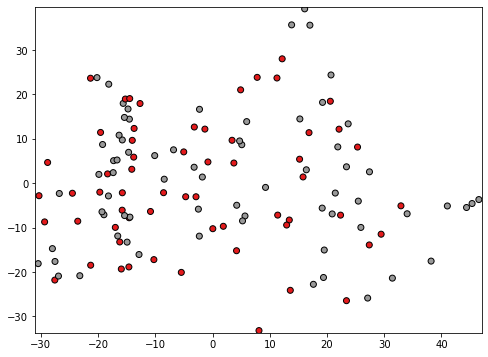

In [10]:
plot(reconstructed_data_pca2d, y)

In [11]:
X_pca2d = PCA(2).fit_transform(X)

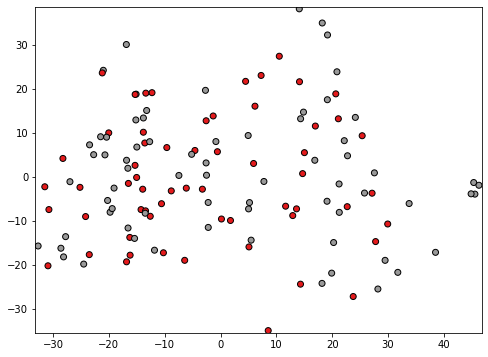

In [12]:
plot(X_pca2d, y)

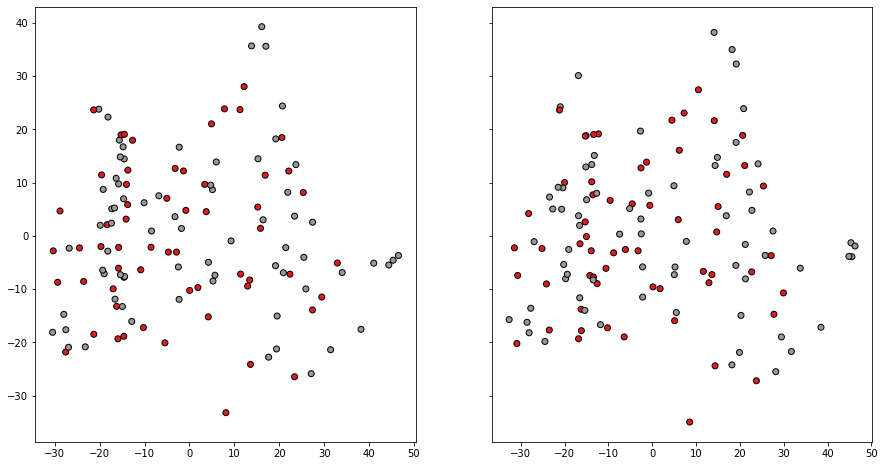

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,8))

X2 = reconstructed_data_pca2d

x_min, x_max = X2[:, 0].min() - .5, X2[:, 0].max() + .5
y_min, y_max = X2[:, 1].min() - .5, X2[:, 1].max() + .5

ax1.scatter(X2[:, 0], X2[:, 1], c=y, cmap=plt.cm.Set1,
          edgecolor='k')

X2 = X_pca2d

x_min, x_max = X2[:, 0].min() - .5, X2[:, 0].max() + .5
y_min, y_max = X2[:, 1].min() - .5, X2[:, 1].max() + .5

ax2.scatter(X2[:, 0], X2[:, 1], c=y, cmap=plt.cm.Set1,
          edgecolor='k')

**Plotting autoencoded 2d data**

In [16]:
weights = autoencoder.encoder.get_weights()
encoder = tf.keras.Sequential([
      layers.Flatten(input_shape=[25]),
      layers.Dense(250, activation='relu'),
      layers.BatchNormalization(),
      layers.Dropout(0.2),
      layers.Dense(150, activation='relu'),
      layers.Dropout(0.1),
      layers.Dense(75, activation='relu'),
      layers.Dense(latent_dim)
    ])
encoder.set_weights(weights)

In [17]:
encoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [18]:
reconstructed_data_enc2d = encoder.predict(X)

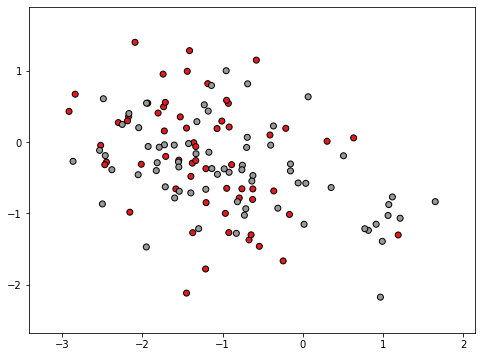

In [19]:
plot(reconstructed_data_enc2d, y)

# Testing algorithm

In [23]:
estimator = ShadowedSetEstimator(solver='gurobi-two-phases')
C0_range = np.concatenate((np.logspace(-2, 1, 5), []))
C1_range = np.concatenate((np.logspace(-2, 1, 5), []))
sigma_range = np.concatenate((np.logspace(-1, 2, 5), []))
param_grid = {'C0': C0_range, 'C1': C1_range, 'sigma': sigma_range}

In [24]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
new_X = np.concatenate((X, reconstructed_data))
new_y = np.concatenate((y, y))
new_data_labels = np.concatenate((data_labels, data_labels))
for train_index, test_index in splitter.split(new_X, new_data_labels):
    X_train = new_X[train_index]
    y_train = new_y[train_index]
    X_test = new_X[test_index]
    y_test = new_y[test_index]

In [25]:
gs = _internal_grid_search(X_train, y_train, X_test, y_test, estimator, 5, param_grid, 'conservative', verbose=1, 
                           log=False, scaled=True)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   28.7s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.1min


Using license file C:\Users\gabri\gurobi.lic
Academic license - for non-commercial use only - expires 2021-03-01


[Parallel(n_jobs=2)]: Done 625 out of 625 | elapsed:  1.5min finished


mean_fit_time                                                      0.268287
std_fit_time                                                     0.00393494
mean_score_time                                                   0.0275261
std_score_time                                                  0.000488422
param_estimator__C0                                                    0.01
param_estimator__C1                                               0.0562341
param_estimator__sigma                                              3.16228
params                    {'estimator__C0': 0.01, 'estimator__C1': 0.056...
split0_test_score                                                  0.567568
split1_test_score                                                  0.648649
split2_test_score                                                  0.638889
split3_test_score                                                  0.666667
split4_test_score                                                  0.694444
mean_test_sc

In [26]:
gs = _internal_grid_search(X_train, y_train, X_test, y_test, estimator, 5, param_grid, 'non-conservative', verbose=1, 
                           log=False, scaled=True)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:   11.7s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   52.5s
[Parallel(n_jobs=2)]: Done 622 out of 625 | elapsed:  1.4min remaining:    0.3s
[Parallel(n_jobs=2)]: Done 625 out of 625 | elapsed:  1.4min finished


mean_fit_time                                                      0.264891
std_fit_time                                                     0.00506955
mean_score_time                                                   0.0277257
std_score_time                                                  0.000746417
param_estimator__C0                                               0.0562341
param_estimator__C1                                               0.0562341
param_estimator__sigma                                              3.16228
params                    {'estimator__C0': 0.05623413251903491, 'estima...
split0_test_score                                                  0.567568
split1_test_score                                                  0.648649
split2_test_score                                                  0.638889
split3_test_score                                                  0.666667
split4_test_score                                                  0.694444
mean_test_sc

In [27]:
X, y, data_labels, target, _ = load_run_over_dataset(target=1, template='macro-districts', without=['DATA'])

In [28]:
estimator = ShadowedSetEstimator(solver='gurobi-two-phases')
C0_range = np.concatenate((np.logspace(-2, 1, 5), []))
C1_range = np.concatenate((np.logspace(-2, 1, 5), []))
sigma_range = np.concatenate((np.logspace(-1, 2, 5), []))
param_grid = {'C0': C0_range, 'C1': C1_range, 'sigma': sigma_range}

In [29]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
new_X = np.concatenate((X, reconstructed_data))
new_y = np.concatenate((y, y))
new_data_labels = np.concatenate((data_labels, data_labels))
for train_index, test_index in splitter.split(new_X, new_data_labels):
    X_train = new_X[train_index]
    y_train = new_y[train_index]
    X_test = new_X[test_index]
    y_test = new_y[test_index]

In [30]:
gs = _internal_grid_search(X_train, y_train, X_test, y_test, estimator, 5, param_grid, 'conservative', verbose=1, 
                           log=False, scaled=True)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    9.2s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   42.1s
[Parallel(n_jobs=2)]: Done 622 out of 625 | elapsed:  1.2min remaining:    0.2s
[Parallel(n_jobs=2)]: Done 625 out of 625 | elapsed:  1.2min finished


mean_fit_time                                                      0.248936
std_fit_time                                                     0.00385453
mean_score_time                                                   0.0247338
std_score_time                                                  0.000398898
param_estimator__C0                                                    0.01
param_estimator__C1                                               0.0562341
param_estimator__sigma                                                  0.1
params                    {'estimator__C0': 0.01, 'estimator__C1': 0.056...
split0_test_score                                                  0.540541
split1_test_score                                                  0.540541
split2_test_score                                                  0.527778
split3_test_score                                                  0.527778
split4_test_score                                                  0.555556
mean_test_sc

In [31]:
gs = _internal_grid_search(X_train, y_train, X_test, y_test, estimator, 5, param_grid, 'non-conservative', verbose=1, 
                           log=False, scaled=True)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    9.4s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   42.5s
[Parallel(n_jobs=2)]: Done 622 out of 625 | elapsed:  1.2min remaining:    0.2s
[Parallel(n_jobs=2)]: Done 625 out of 625 | elapsed:  1.2min finished


mean_fit_time                                                       0.24734
std_fit_time                                                      0.0039608
mean_score_time                                                   0.0235316
std_score_time                                                  0.000495952
param_estimator__C0                                               0.0562341
param_estimator__C1                                               0.0562341
param_estimator__sigma                                             0.562341
params                    {'estimator__C0': 0.05623413251903491, 'estima...
split0_test_score                                                  0.513514
split1_test_score                                                  0.567568
split2_test_score                                                  0.583333
split3_test_score                                                  0.527778
split4_test_score                                                  0.555556
mean_test_sc

In [32]:
np.round(0.5641025641025641, 3), np.round(0.5384615384615384, 3)

(0.564, 0.538)

In [33]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in splitter.split(reconstructed_data_enc2d, data_labels):
    X_train = reconstructed_data_enc2d[train_index]
    y_train = y[train_index]
    X_test = reconstructed_data_enc2d[test_index]
    y_test = y[test_index]

In [34]:
gs = _internal_grid_search(X_train, y_train, X_test, y_test, estimator, 5, param_grid, 'conservative', verbose=1, 
                           log=False, scaled=True)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 164 tasks      | elapsed:    6.5s


mean_fit_time                                                     0.0959422
std_fit_time                                                     0.00192935
mean_score_time                                                  0.00977364
std_score_time                                                  0.000398946
param_estimator__C0                                                    0.01
param_estimator__C1                                               0.0562341
param_estimator__sigma                                                  0.1
params                    {'estimator__C0': 0.01, 'estimator__C1': 0.056...
split0_test_score                                                   0.52381
split1_test_score                                                   0.52381
split2_test_score                                                   0.52381
split3_test_score                                                  0.571429
split4_test_score                                                      0.55
mean_test_sc

[Parallel(n_jobs=2)]: Done 625 out of 625 | elapsed:   26.6s finished
